# Exploratory Data Analysis

In [108]:
#Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import math
import missingno as msno
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

***

## 1. Importing Data

In [109]:
energy_df = pd.read_csv('/Users/nicolasrosal/Desktop/Machine Learning Projects/SM_London/Datasets after Cleaning/energy_df.csv')


Replacing we decided to group uvIndex values by 'low', 'medium' and 'high' according EPA's classification.

In [110]:
energy_df['uvIndex'] = energy_df['uvIndex'].replace([0,1,2], 'Low').replace([3,4,5], 'Medium').replace([6,7], 'High')

***

## 2. EDA

In [111]:
#Visualise data
energy_df.head()

LCLid         day  Avg.Dawn  Avg.Morning_Afternoon  Avg.Evening  \
0  MAC000002  2012-10-13  0.133556               0.266667       0.2927   
1  MAC000246  2012-10-13  0.227889               0.342667       0.3197   
2  MAC000450  2012-10-13  1.216778               2.424250       2.7396   
3  MAC001074  2012-10-13  0.294333               0.552583       0.7322   
4  MAC003223  2012-10-13  0.126000               0.521250       0.6157   

   Avg.Night  holiday stdorToU    Acorn Acorn_grouped  ...  visibility  \
0   0.218854        0      Std  ACORN-A      Affluent  ...       11.86   
1   0.552292        0      Std  ACORN-A      Affluent  ...       11.86   
2   1.344580        0      Std  ACORN-A      Affluent  ...       11.86   
3   0.366943        0      ToU  ACORN-E        ACORN-  ...       11.86   
4   0.335382        0      Std  ACORN-A      Affluent  ...       11.86   

   humidity  uvIndex temperatureLow  temperatureMin  temperatureHigh  \
0       0.8      Low           4.09            2.81            12.32   
1       0.8      Low           4.09            2.81            12.32   
2       0.8      Low           4.09            2.81            12.32   
3       0.8      Low           4.09            2.81            12.32   
4       0.8      Low           4.09            2.81            12.32   

   moonPhase    sunset   sunrise           Season  
0       0.96  17:00:00  06:00:00  StartSpr/EndAut  
1       0.96  17:00:00  06:00:00  StartSpr/EndAut  
2       0.96  17:00:00  06:00:00  StartSpr/EndAut  
3       0.96  17:00:00  06:00:00  StartSpr/EndAut  
4       0.96  17:00:00  06:00:00  StartSpr/EndAut  

[5 rows x 29 columns]

***

### Univariate Analysis

In [112]:
#Describe Numerical Features
energy_df.describe()

Avg.Dawn  Avg.Morning_Afternoon   Avg.Evening     Avg.Night  \
count  3.458674e+06           3.458674e+06  3.458674e+06  3.458674e+06   
mean   1.660610e-01           2.140621e-01  2.742092e-01  1.966436e-01   
std    1.819667e-01           2.288002e-01  2.658381e-01  1.973097e-01   
min    0.000000e+00           0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.788889e-02           7.925000e-02  1.072000e-01  8.561148e-02   
50%    1.150000e-01           1.475000e-01  1.999000e-01  1.440994e-01   
75%    1.974444e-01           2.650833e-01  3.498000e-01  2.391681e-01   
max    6.947222e+00           7.694667e+00  8.000300e+00  6.778909e+00   

            holiday    energy_sum  temperatureMax   windBearing      dewPoint  \
count  3.458674e+06  3.458674e+06    3.458674e+06  3.458674e+06  3.458674e+06   
mean   2.315367e-02  1.016167e+01    1.414936e+01  1.952654e+02  6.950120e+00   
std    1.503914e-01  9.130138e+00    6.537122e+00  8.890295e+01  5.003109e+00   
min    0.000000e+00  0.000000e+00   -6.000000e-02  0.000000e+00 -7.840000e+00   
25%    0.000000e+00  4.714000e+00    9.420000e+00  1.240000e+02  3.280000e+00   
50%    0.000000e+00  7.841000e+00    1.328000e+01  2.170000e+02  7.040000e+00   
75%    0.000000e+00  1.259600e+01    1.882000e+01  2.520000e+02  1.078000e+01   
max    1.000000e+00  3.325560e+02    3.240000e+01  3.590000e+02  1.777000e+01   

         cloudCover     windSpeed      pressure    visibility      humidity  \
count  3.458674e+06  3.458674e+06  3.458674e+06  3.458674e+06  3.458674e+06   
mean   4.815780e-01  3.593683e+00  1.012971e+03  1.129204e+01  7.796736e-01   
std    1.906483e-01  1.694013e+00  1.056294e+01  2.327789e+00  9.711503e-02   
min    0.000000e+00  2.000000e-01  9.792500e+02  1.480000e+00  4.300000e-01   
25%    3.500000e-01  2.380000e+00  1.006770e+03  1.048000e+01  7.100000e-01   
50%    4.700000e-01  3.450000e+00  1.013640e+03  1.199000e+01  7.900000e-01   
75%    6.100000e-01  4.570000e+00  1.019890e+03  1.283000e+01  8.600000e-01   
max    1.000000e+00  9.960000e+00  1.040920e+03  1.534000e+01  9.800000e-01   

       temperatureLow  temperatureMin  temperatureHigh     moonPhase  
count    3.458674e+06    3.458674e+06     3.458674e+06  3.458674e+06  
mean     8.168942e+00    7.885550e+00     1.402320e+01  5.030553e-01  
std      5.051598e+00    5.077339e+00     6.627398e+00  2.867863e-01  
min     -5.640000e+00   -5.640000e+00    -8.100000e-01  0.000000e+00  
25%      4.170000e+00    3.700000e+00     9.190000e+00  2.600000e-01  
50%      8.170000e+00    7.610000e+00     1.314000e+01  5.100000e-01  
75%      1.224000e+01    1.207000e+01     1.881000e+01  7.500000e-01  
max      2.054000e+01    2.054000e+01     3.240000e+01  9.900000e-01

In [113]:
#Describe Categorical Features
energy_df.describe(include=['O'])

LCLid         day stdorToU    Acorn Acorn_grouped  \
count     3458674     3458674  3458674  3458674       3458674   
unique       5560         825        2       18             5   
top     MAC000147  2012-11-18      Std  ACORN-E      Affluent   
freq          824        5525  2762740  1009189       1388081   

                     icon precipType  uvIndex    sunset   sunrise  \
count             3458674    3458674  3458674   3458674   3458674   
unique                  6          2        3         5         5   
top     partly-cloudy-day       rain      Low  20:00:00  08:00:00   
freq              2520680    3388959  1951613    919000    856999   

                 Season  
count           3458674  
unique                4  
top     StartSpr/EndAut  
freq            1015849

In [114]:
# Check the starting and finishing date of dataset
print("Start date is", min(energy_df['day']))
print("End date is", max(energy_df['day']))

Start date is 2011-11-24
End date is 2014-02-27


In [115]:
# Check population of Acorns in London
energy_df['Acorn'].value_counts()

ACORN-E    1009189
ACORN-Q     524688
ACORN-F     440475
ACORN-H     268104
ACORN-L     201059
ACORN-D     186325
ACORN-G     121981
ACORN-K     104813
ACORN-A      91571
ACORN-N      90508
ACORN-C      87492
ACORN-P      71084
ACORN-M      65243
ACORN-J      63834
ACORN-O      59937
ACORN-U      29076
ACORN-I      29023
ACORN-B      14272
Name: Acorn, dtype: int64

In [116]:
#Checking acorn agglomerations
energy_df['Acorn_grouped'].unique()

array(['Affluent', 'ACORN-', 'Comfortable', 'Adversity', 'ACORN-U'],
      dtype=object)

***

We fixed 'Acorn_grouped' following the groups defined in the Acorn User Guide

In [117]:
#Fixing the 'Acorn_grouped'

affluent = ['ACORN-A', 'ACORN-B', 'ACORN-C']
rising = ['ACORN-D', 'ACORN-E']
comfortable = ['ACORN-F', 'ACORN-G', 'ACORN-H', 'ACORN-I', 'ACORN-J']
stretched = ['ACORN-K', 'ACORN-L', 'ACORN-M', 'ACORN-N']
adversity = ['ACORN-O', 'ACORN-P', 'ACORN-Q']
other = ['ACORN-U']

groups = []

for acorn in energy_df['Acorn']:
    if acorn in affluent:
        groups.append('Affluent')
    elif acorn in comfortable:
        groups.append('Comfortable')
    elif acorn in rising:
        groups.append('Rising')
    elif acorn in stretched:
        groups.append('Stretched')
    elif acorn in adversity:
        groups.append('Adversity')
    elif acorn in other:
        groups.append('Other')
        
energy_df['Acorn_grouped'] = groups

In [118]:
#Re-Checking acorn agglomerations
energy_df['Acorn_grouped'].unique()

array(['Affluent', 'Rising', 'Comfortable', 'Stretched', 'Adversity',
       'Other'], dtype=object)

Plotting Distributions

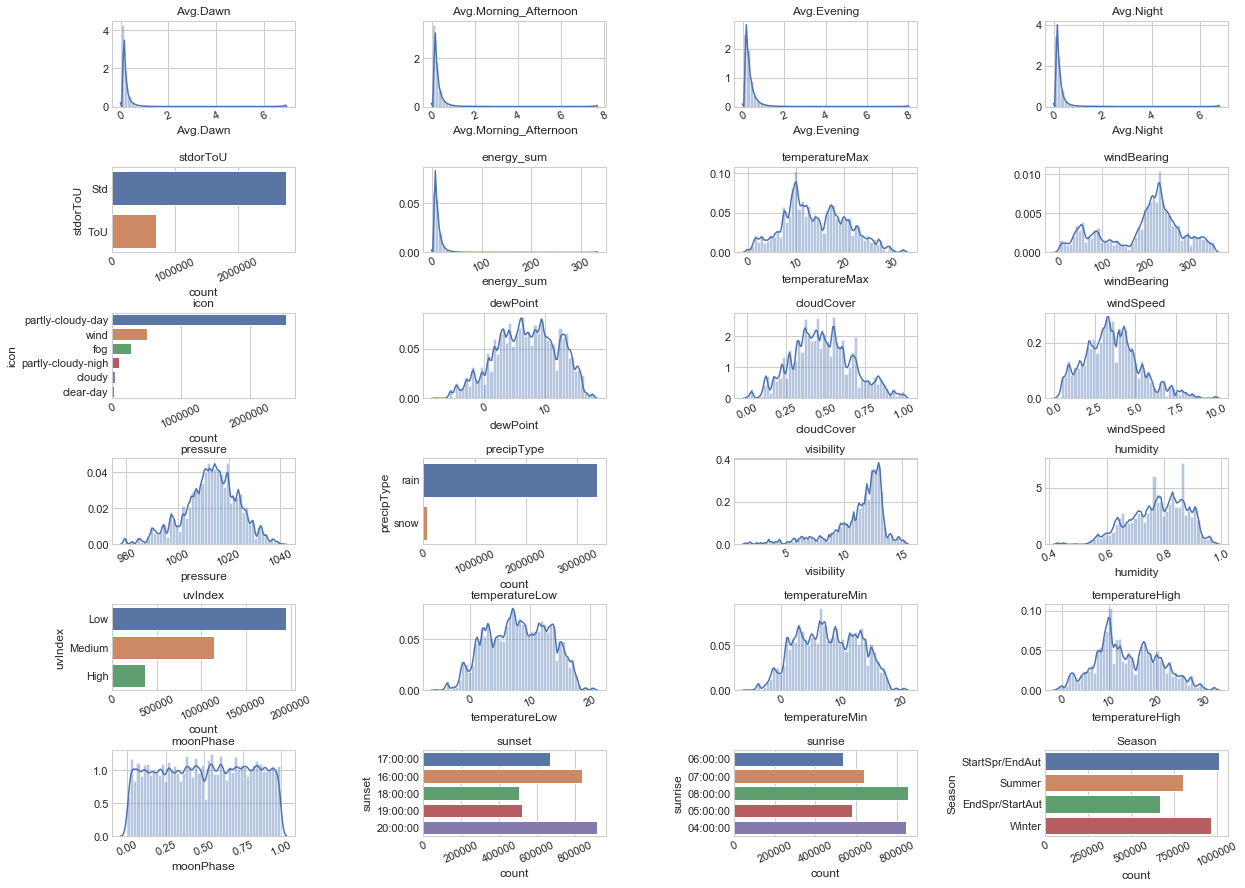

In [119]:
#Plot distributions of each feature (Adapted from: Daniel Martinez)
def plot_distribution(dataset, cols=4, width=20, height=15, hspace=0.7, wspace=0.7):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(energy_df.drop(['LCLid','day','Acorn', 'Acorn_grouped', 'holiday'], axis = 1))

Missing Values

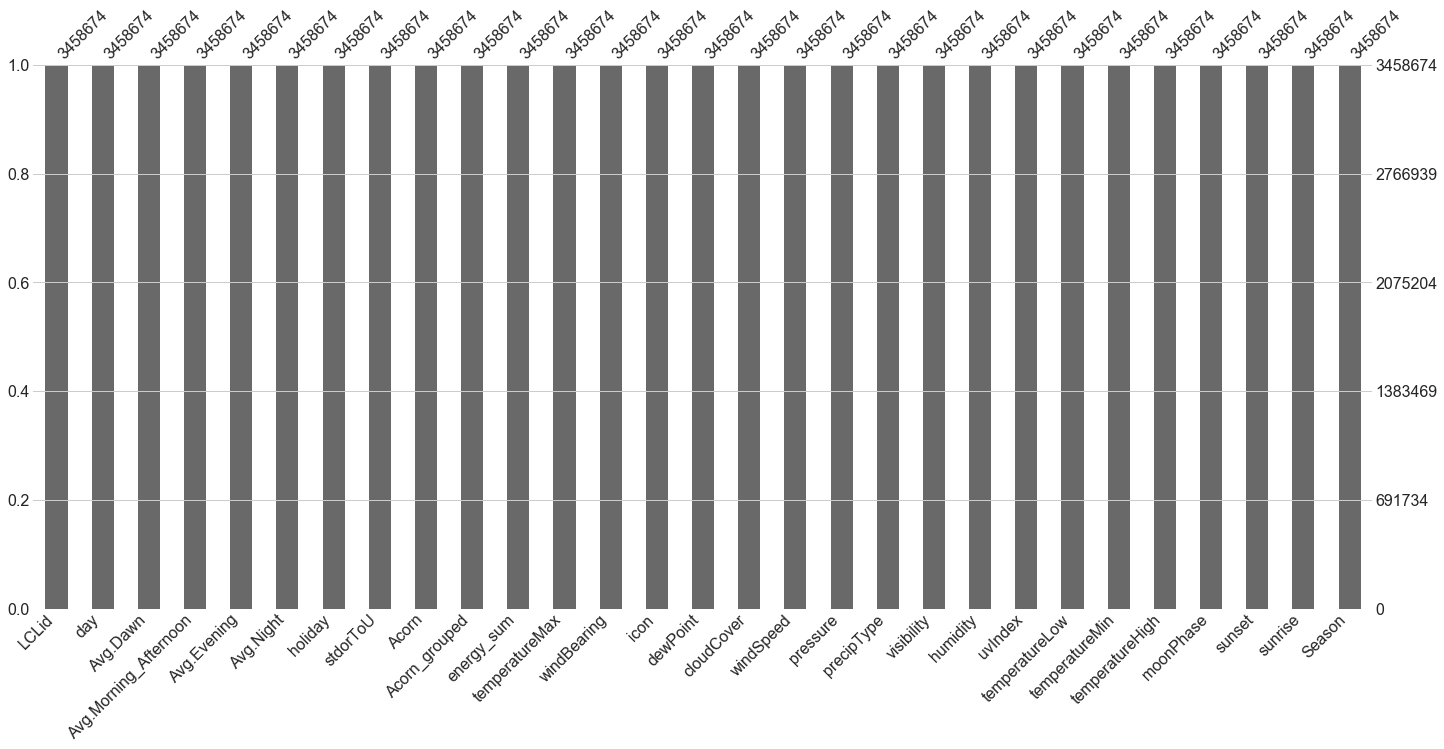

In [120]:
#Visualising Missing Values
msno.bar(energy_df)
plt.show()

Outliers Analysis

In [121]:
#Function to retrieve outliers
def find_outliers(dataset):
    
    outliers = {}
    
    for i in list(dataset.loc[:, dataset.dtypes != np.object]):
        Q1 = dataset[i].quantile(0.25)
        Q3 = dataset[i].quantile(0.75)
        IQR = Q3 - Q1
        num_outliers = ((dataset[i] < (Q1 - 1.5 * IQR)) | (dataset[i] > (Q3 + 1.5 * IQR)))
        outliers[i] = num_outliers
        
    return outliers

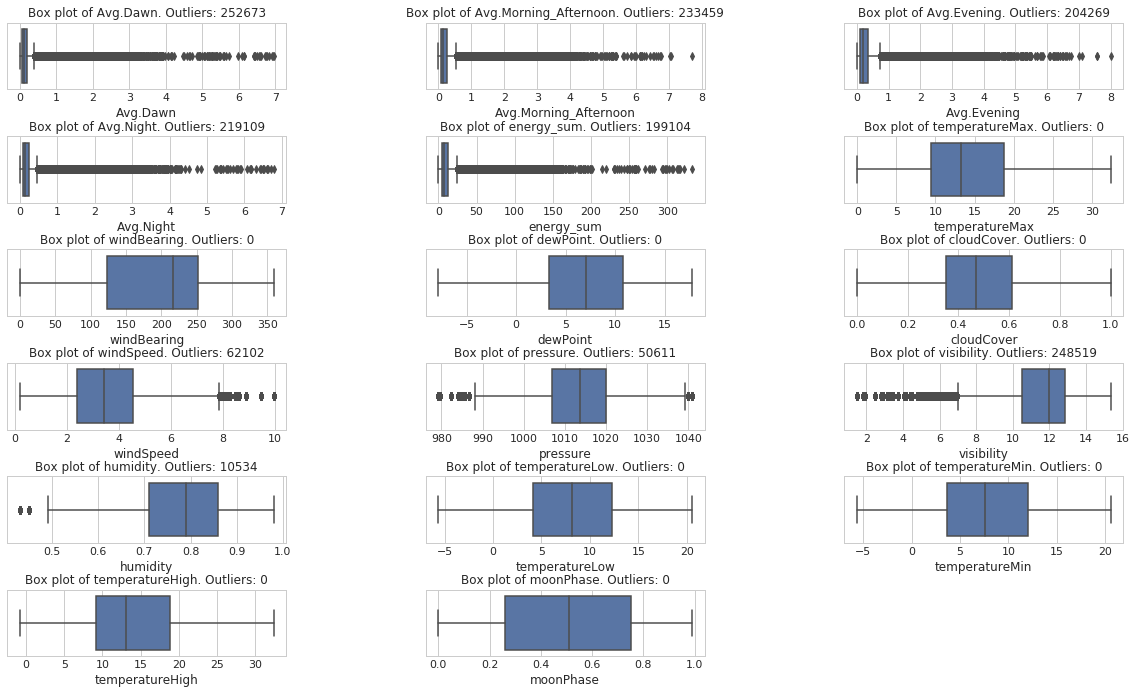

In [122]:
#Testing for outliers
def plot_box(dataset, cols=3, width=20, height=20, hspace=0.7, wspace=0.5):
    
    outliers = find_outliers(dataset)
    
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(outliers.keys()):
        ax = fig.add_subplot(rows, cols, i + 1)
        g = sns.boxplot(dataset[column])
        ax.set_title('Box plot of {}. Outliers: {}'.format(column, outliers[column].sum()))
    
plot_box(energy_df.drop('holiday', axis = 1))
plt.style.use('default')

<div class="alert alert-block alert-info">
    We have identified that <b>'visibility'</b> presents a high number of outliers (given that its skewed to the left). We will further explore these outliers to verify if their values make sense. Given that visibility can change significantly during certain days of the year, removing these would not be pertinent (unless they are unreasonable values). Moreover, we have identified outliers in <b>'energy_sum', 'Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening'</b>, and <b>'Avg.Night'</b>. We will also explore these values to verify if they are reasonable given the scale and nature of the data.
</div>

In [123]:
# Dictionary of Boolean masks of outliers per column
outliers_dict = find_outliers(energy_df)

***

### Multivariate Analysis

Outliers vs Season

In [124]:
#function to plot number of outliers in a column per season
def outliers_vs_season(column):
    outliers = energy_df[outliers_dict[column] == True]
    outlier_season = outliers.groupby('Season')[column].size()
    
    num_outliers = []
    seasons = ['Winter', 'Summer', 'StartSpr/EndAut', 'EndSpr/StartAut']

    for season in seasons:
        num_outliers.append(outlier_season[season])
    
    sns.barplot(seasons, num_outliers)
    plt.title('Number of outliers per Season')
    plt.xlabel('Season')
    plt.ylabel('Number of Outliers:' + str(column))

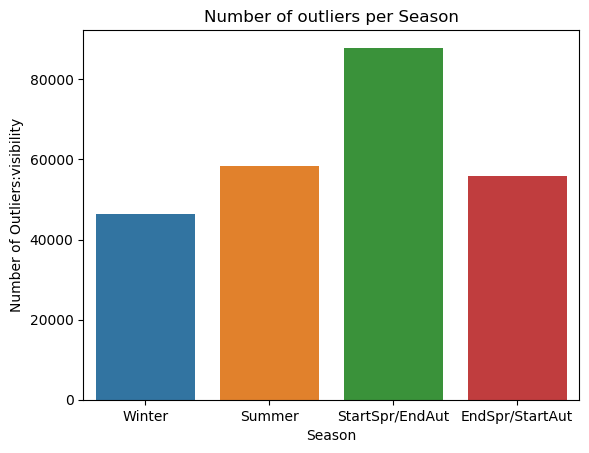

In [125]:
#Exploring 'visibility' outliers
outliers_vs_season('visibility')

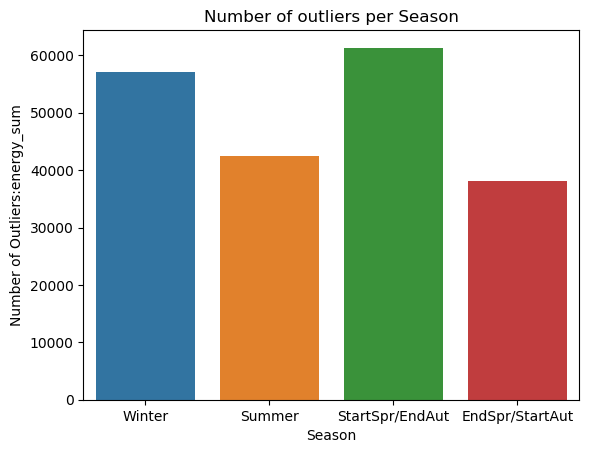

In [126]:
#Exploring 'energy_sum' outliers
outliers_vs_season('energy_sum')

<div class="alert alert-block alert-info">
    Given that visibility can change significantly during certain days of the year, removing these would not be pertinent (unless they are unreasonable values). In this case, it is evidenced that most of the outliers occur in <b> Winter </b>  and <b>StartSpr/EndAut</b> which makes makes sense as visibility decreases during colder periods. Similarly, it has been found that households tend to consume more energy during colder climates. Hence, <b>'energy_sum', 'Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening'</b>, and <b>'Avg.Night'</b> outliers will be kept. 
</div>

Finally, we wanted to test whether the number of outliers would be significant to decide whether to delete or keep this values. Nevertheless, we noticed only 5.7% of the data contained outliers. Thus, contributing to our decision of keeping them.  

In [127]:
#Percentage of outliers in data
energy_outliers = energy_df[outliers_dict['energy_sum'] == True]
energy_outliers_df = pd.DataFrame(energy_outliers[['LCLid', 'Season', 'energy_sum', 'Acorn']])

energy_outliers_df.shape[0]/energy_df.shape[0]

0.05756657030989333

Correlation Analysis (Heatmap)

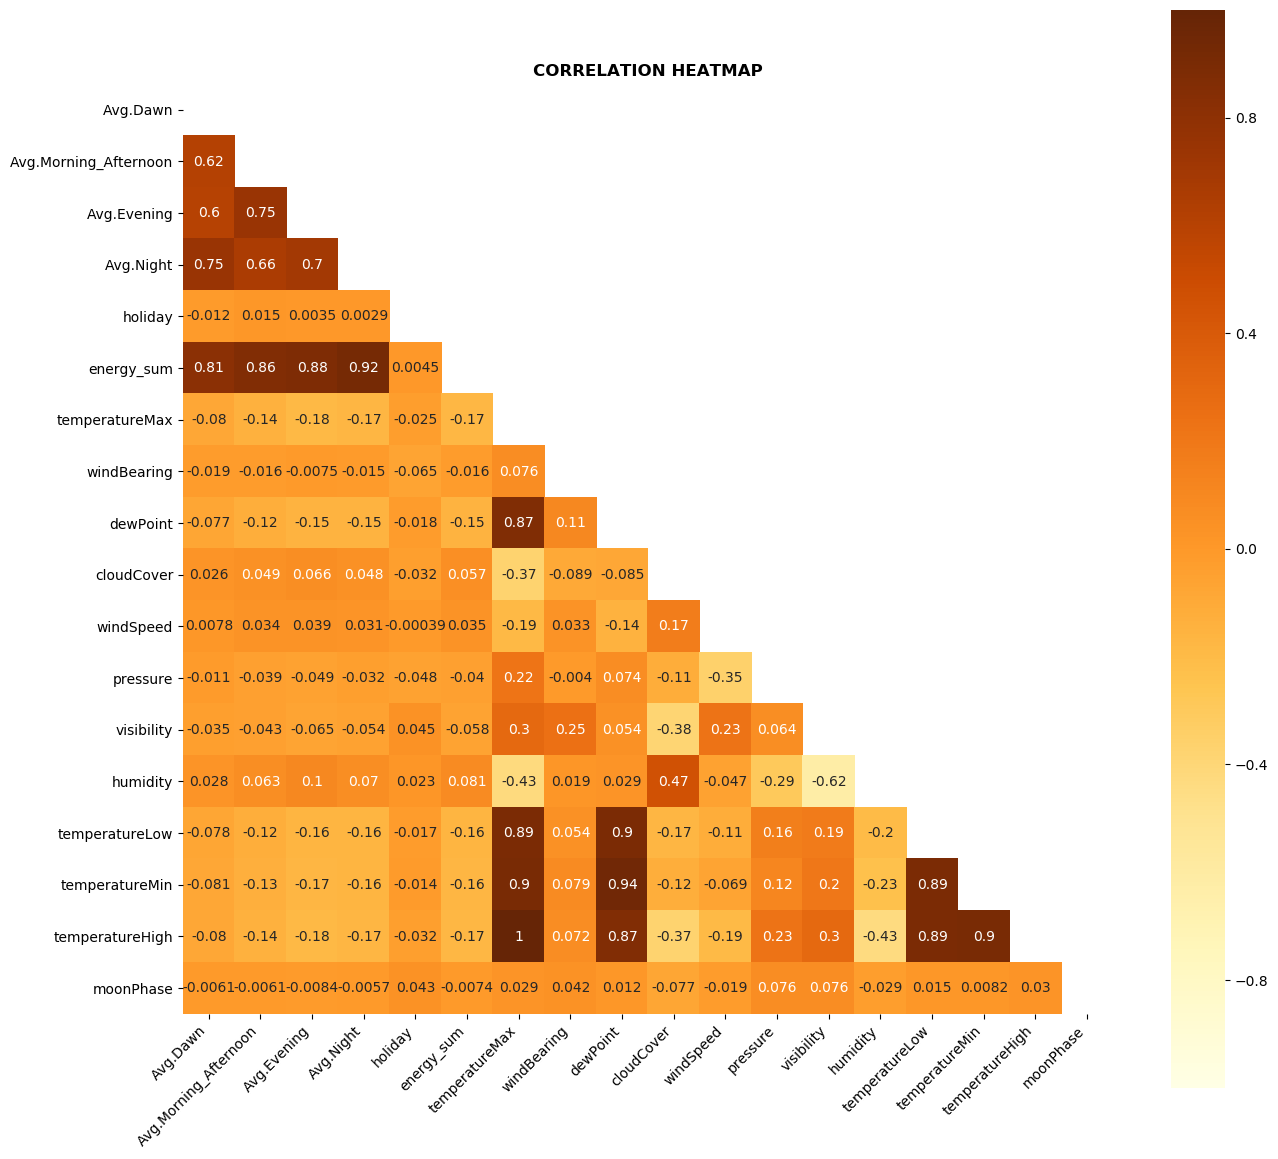

In [128]:
#Correlation Heatmap
corr = energy_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(15, 14))

ax = sns.heatmap(
    corr, mask = mask, 
    vmin = -1, vmax = 1, center = 0,
    cmap = 'YlOrBr',
    square = True, 
    annot = True,
    annot_kws={"size": 10})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

plt.title('CORRELATION HEATMAP', fontweight="bold")
plt.show()

<div class="alert alert-block alert-info">
    <p>With the correlation heatmap, we identified the following:</p>
        <p>- 'temperatureMax' appears to have a  <b>strong positive correlation</b> (0.85 +) with 'temperatureLow', 'temperatureMin','temperatureHigh', and 'dewPoint'</p>
        <p>- 'dewPoint' appears to have a  <b>strong positive correlation</b> (0.85 +) with 'temperatureLow', 'temperatureMin','temperatureHigh', and 'temperatureMax'</p>
        <p>- 'temperatureLow' appears to have a <b>strong positive correlation</b> (0.85 +) with 'temperatureHigh' and 'temperatureMin'</p>
        <p>- 'temperatureMax' appears to have a <b>strong negative correlation</b> (-0.85 -) with 'energy_sum'</p>
        <p>- 'temperatureMin' appears to have a <b>strong negative correlation</b> (0.80+) with 'energy_sum'</p>
        <p>- 'temperatureHigh' appears to have a <b>strong negative correlation</b> (0.80+) with 'energy_sum'</p>
        <p>- 'energy_sum' appears to have a <b>strong positive correlation</b> (0.80+) with 'Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening', and 'Avg.Night'</p>
</div>

Correlation Analysis (Pairplots) - correlation analysis of the highly correlated variables mentioned above.

In [129]:
#Pairplot of features with strong negative/positive correlation
corr_features1 = ['temperatureMax', 'temperatureLow', 'temperatureMin', 'temperatureHigh', 'dewPoint']
corr_features2 = ['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night', 'energy_sum']

<Figure size 900x800 with 0 Axes>

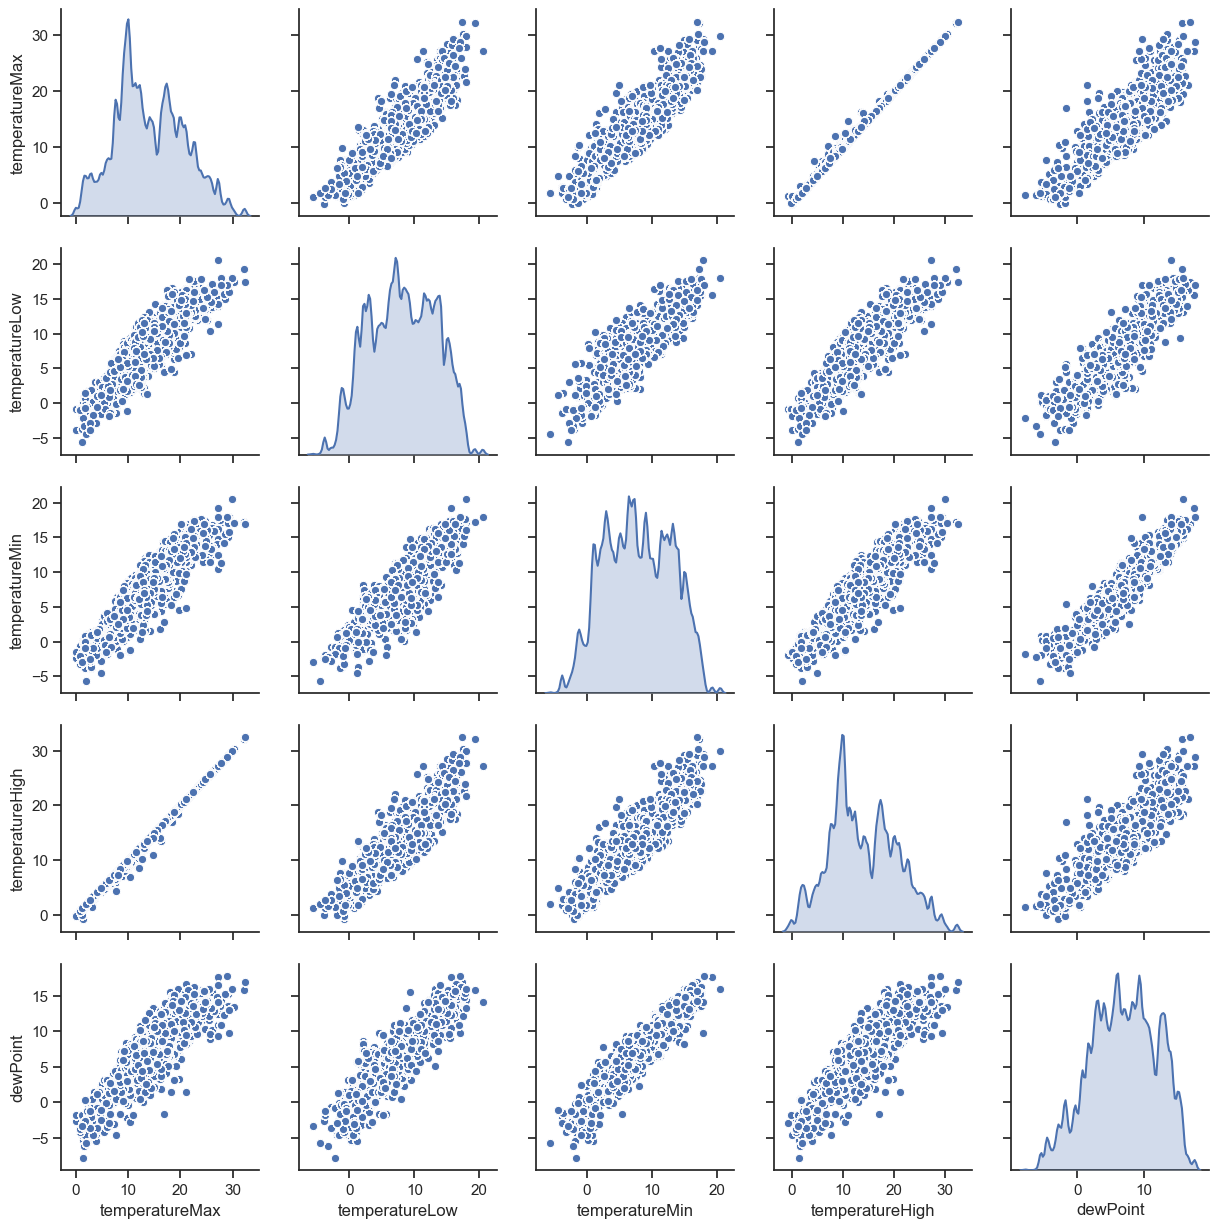

In [130]:
#Pairwise plot 1
plt.figure(figsize=(9, 8))
sns.set(style="ticks", color_codes=True)
sns.pairplot(energy_df[corr_features1], diag_kind="kde")

<Figure size 900x800 with 0 Axes>

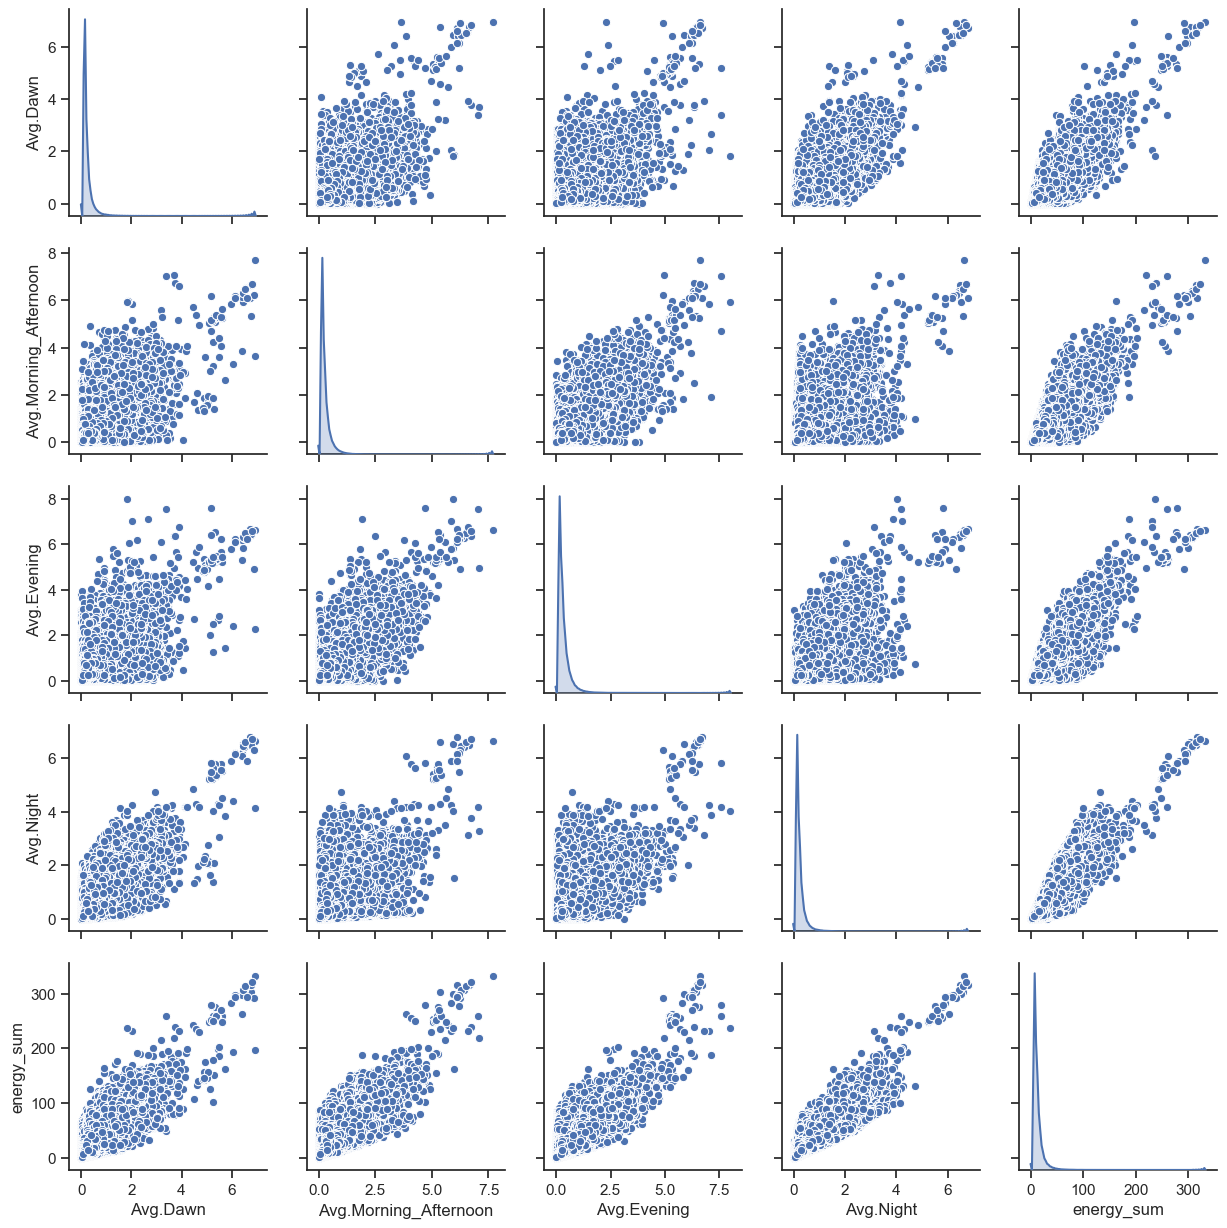

In [131]:
#Pairwise plot 2
plt.figure(figsize=(9, 8))
sns.set(style="ticks", color_codes=True)
sns.pairplot(energy_df[corr_features2], diag_kind="kde")

In [132]:
#Dropping correlated variables
energy_df.drop(['temperatureLow', 'temperatureMin', 'temperatureHigh', 'dewPoint'], axis = 1, inplace = True)

<div class="alert alert-block alert-info">
    <p>- 'temperatureMax' was selected out of the other variables for the following reasons: 1) reduce high dimensionality, 2) hotter days have higher minimum temperatures, and  3) 'temperatureLow' and 'temperatureHigh' showed a similar behaviour to 'temperatureMin' and 'temperatureMax' (these information is contained within 'temperatureMax') </p>
    <p>- We have identified a very strong correlation between 'Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night', and 'energy_sum'. Nevertheless, we decided to keep all these features for modelling but we will keep in mind this findings in order to avoid undesired outcomes due to the correlation. </p>
</div>

Violin Plots - helped verify Seasons (engineered featured). We noticed temperatureMax is lower, cloud cover is higher and visibility is lower in 'StartSpr/EndAut' and 'Winter than in 'Summer' and 'EndSpr/StartAut'. This makes sense considering the formers have colder climates and cloudier days. 

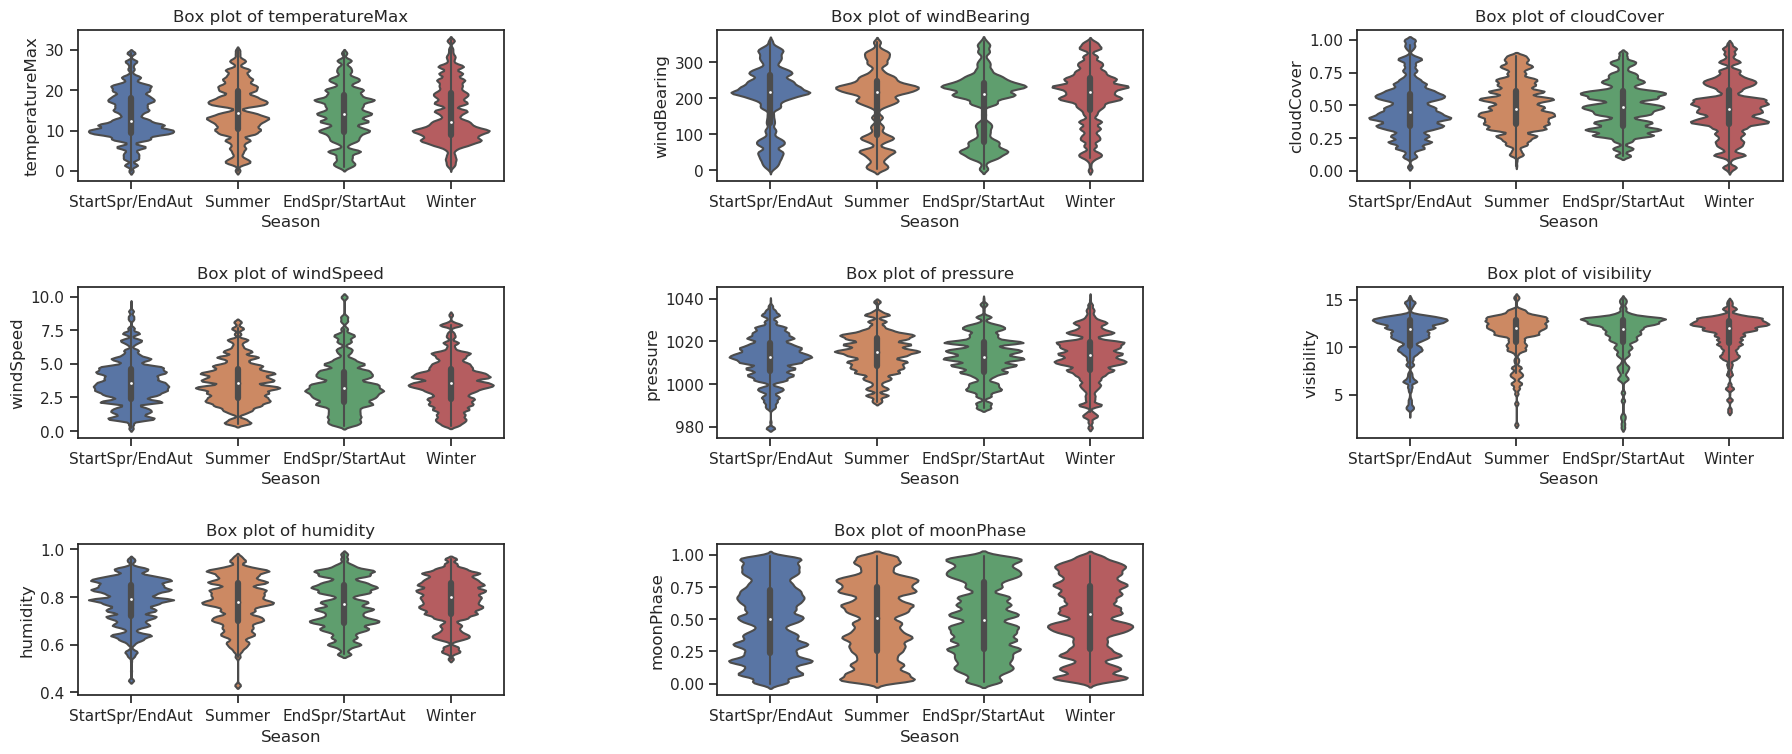

In [133]:
#Violin plots vs Season
def plot_violin(dataset, cols=3, width=22, height=22, hspace=0.7, wspace=0.5):
    
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(list(dataset.loc[:, dataset.dtypes != np.object])):
        ax = fig.add_subplot(rows, cols, i + 1)
        g = sns.violinplot(x='Season', y = column, data = dataset)
        ax.set_title('Box plot of {}'.format(column))
    
plot_violin(energy_df.drop(['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night', 'holiday', 'energy_sum'],
                           axis = 1))
plt.style.use('default')

Plotting Energy Sum over time to visualise Seasonality

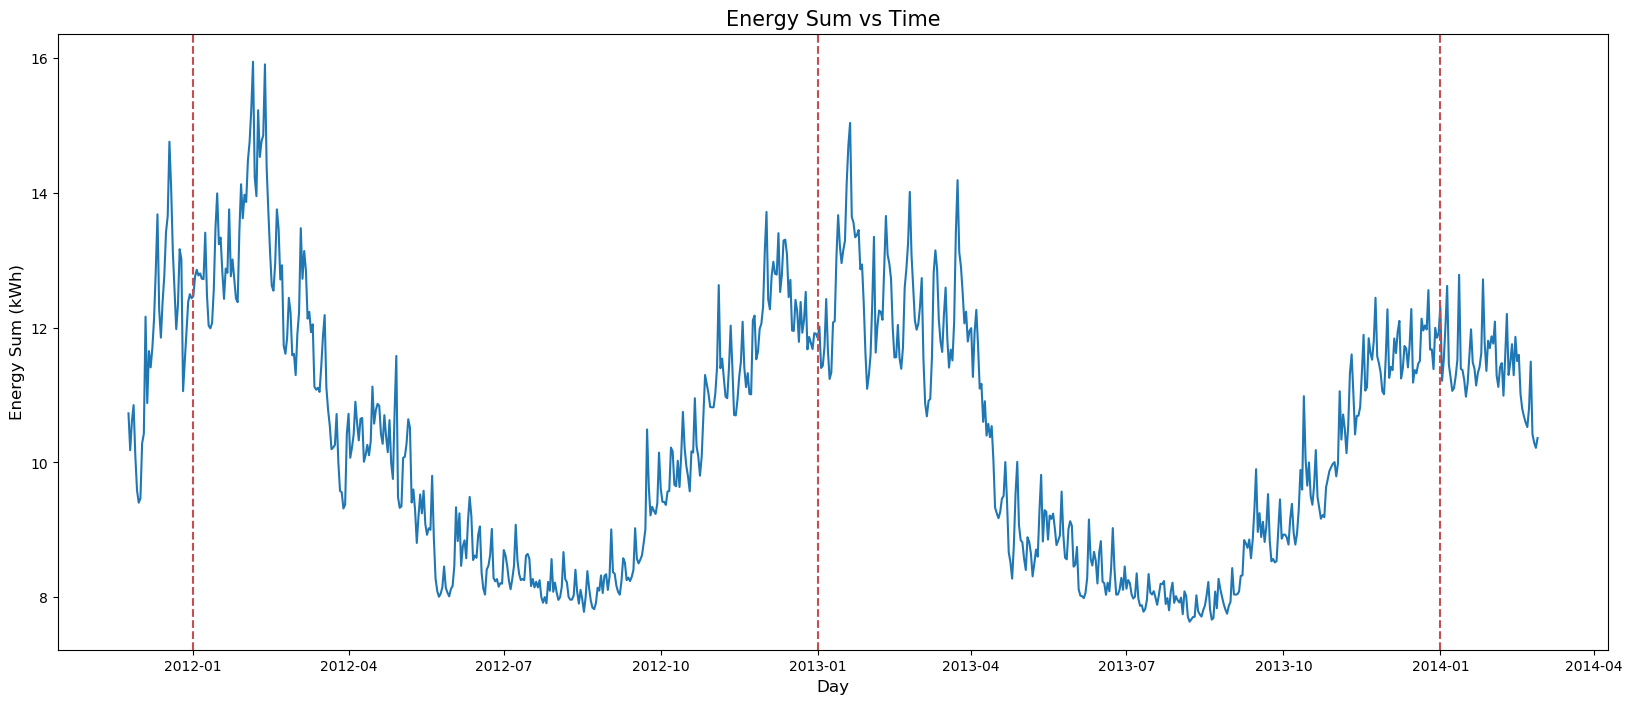

In [134]:
#Energy sum vs Time
energy_df['day'] = pd.to_datetime(energy_df['day'])
day = pd.DataFrame(energy_df.groupby('day'))

# Plot day vs energy_sum
plt.figure(figsize=(20, 8))

plt.plot(day[0], energy_df.groupby('day').mean()['energy_sum'])
plt.title('Energy Sum vs Time', fontsize = 15)
plt.ylabel('Energy Sum (kWh)', fontsize = 12)
plt.xlabel('Day', fontsize = 12)

xcoords = ['2012-01-01', '2013-01-01', '2014-01-01']
for xc in xcoords:
    x = pd.to_datetime(xc)
    plt.axvline(x=x.date(), color = 'r', linestyle = '--')

Plotting energy averages per time of day over time to visualise Seasonality per time of day

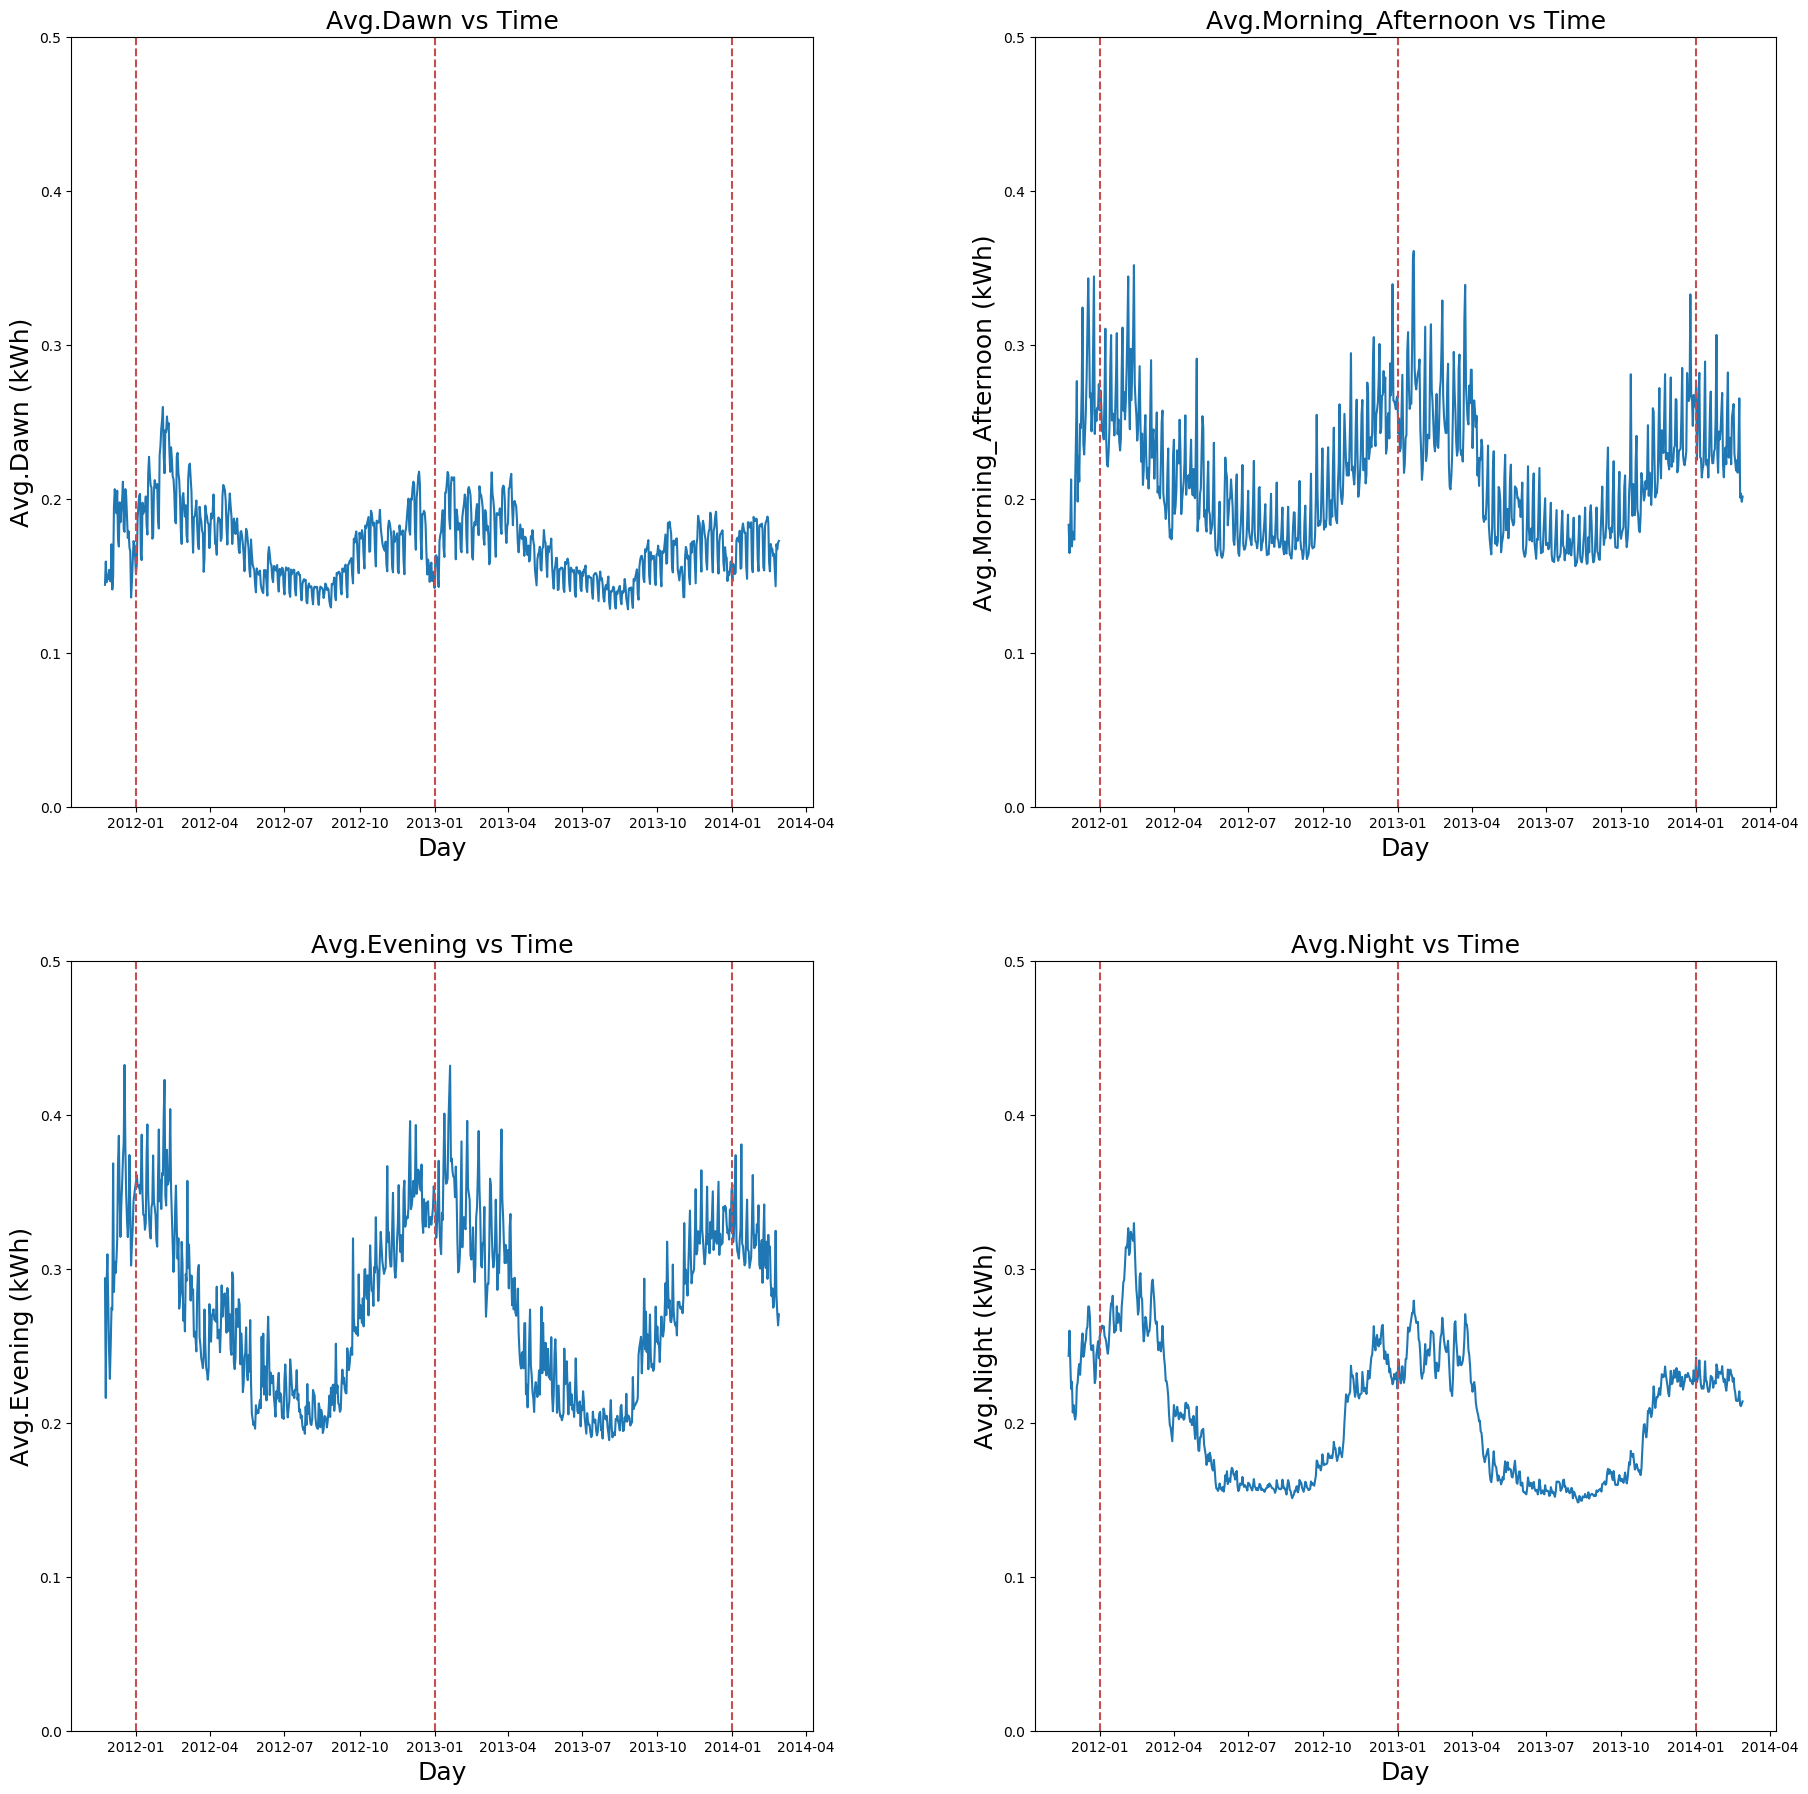

In [135]:
#Averages per time of day vs Time
energy_df['day'] = pd.to_datetime(energy_df['day'])
day = pd.DataFrame(energy_df.groupby('day'))

# Plot day vs energy_sum
fig = plt.figure(figsize=(22, 22))
fig.subplots_adjust(wspace=0.3, hspace=0.2)

for i, column in enumerate(['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night']):
    ax = fig.add_subplot(2, 2, i + 1)
    plt.plot(day[0], energy_df.groupby('day').mean()[column])
    ax.set_title('{} vs Time'.format(column), fontsize = 18)
    ax.set_ylabel('{} (kWh)'.format(column), fontsize = 18)
    ax.set_xlabel('Day', fontsize = 18)
    ax.set_ylim(0, 0.50)
    
    xcoords = ['2012-01-01', '2013-01-01', '2014-01-01']
    for xc in xcoords:
        x = pd.to_datetime(xc)
        plt.axvline(x=x.date(), color = 'r', linestyle = '--')

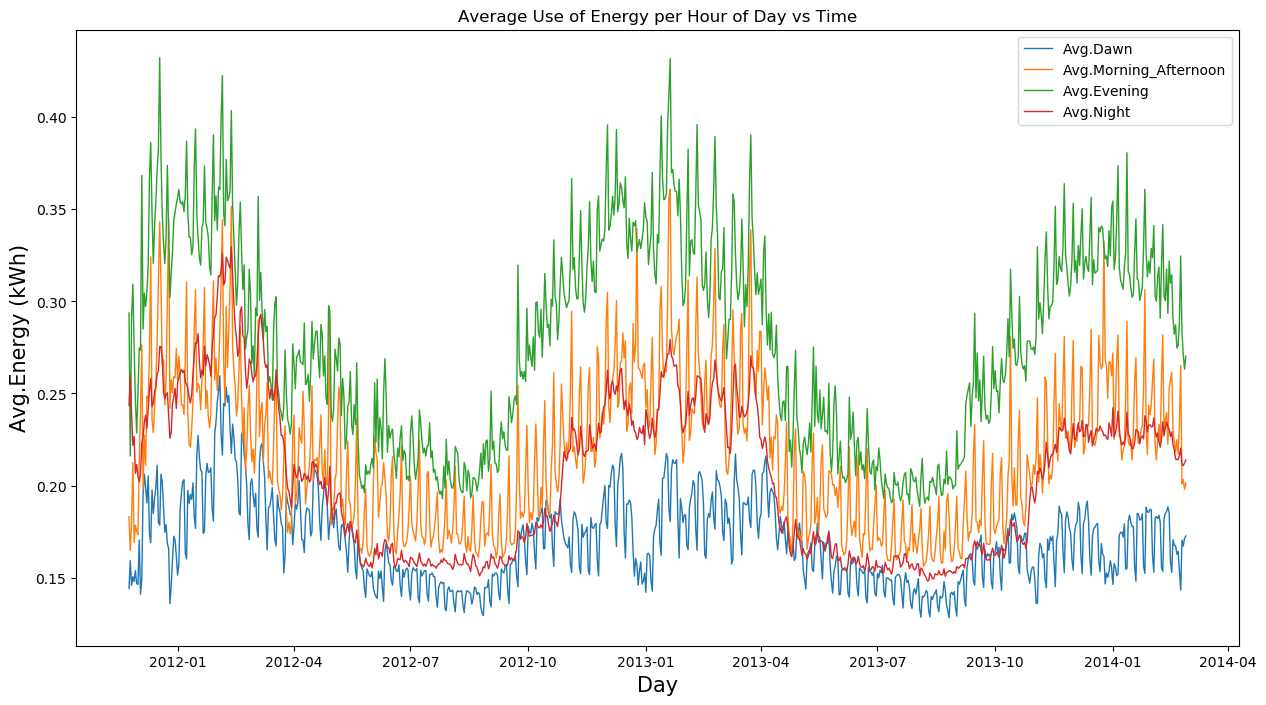

In [136]:
#Averages per time of day vs Time (one plot)
plt.figure(figsize=(15, 8))

for column in ['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night']:
    plt.plot(day[0], energy_df.groupby('day').mean()[column], label=column, linewidth = 1)

plt.title('Average Use of Energy per Hour of Day vs Time')
plt.ylabel('Avg.Energy (kWh)', fontsize = 15)
plt.xlabel('Day', fontsize = 15)
plt.legend(loc="upper right")

plt.show()

Plotting Energy Sum per contract type over time to visualise differences in consumption between contract types

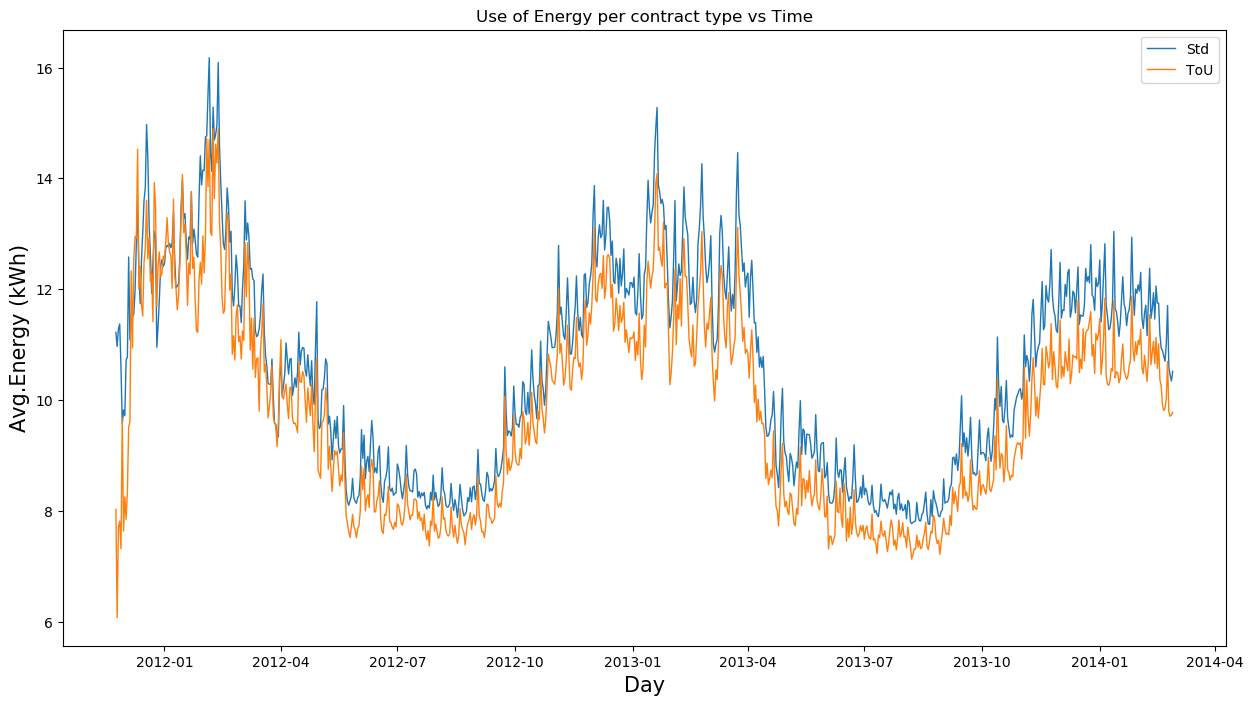

In [137]:
#Energy per Contract Type vs Time
plt.figure(figsize=(15, 8))
for value in ['Std', 'ToU']:
    contract_type = energy_df[energy_df['stdorToU'] == value]
    plt.plot(day[0], contract_type.groupby('day').mean()['energy_sum'], label=value, linewidth = 1)

plt.title('Use of Energy per contract type vs Time')
plt.ylabel('Avg.Energy (kWh)', fontsize = 15)
plt.xlabel('Day', fontsize = 15)
plt.legend(loc="upper right")

plt.show()

Plotted Energy Sum per contract type over time per time of day. This would help us see specifically during what time of day one contract tends to consume more or less energy than the other.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

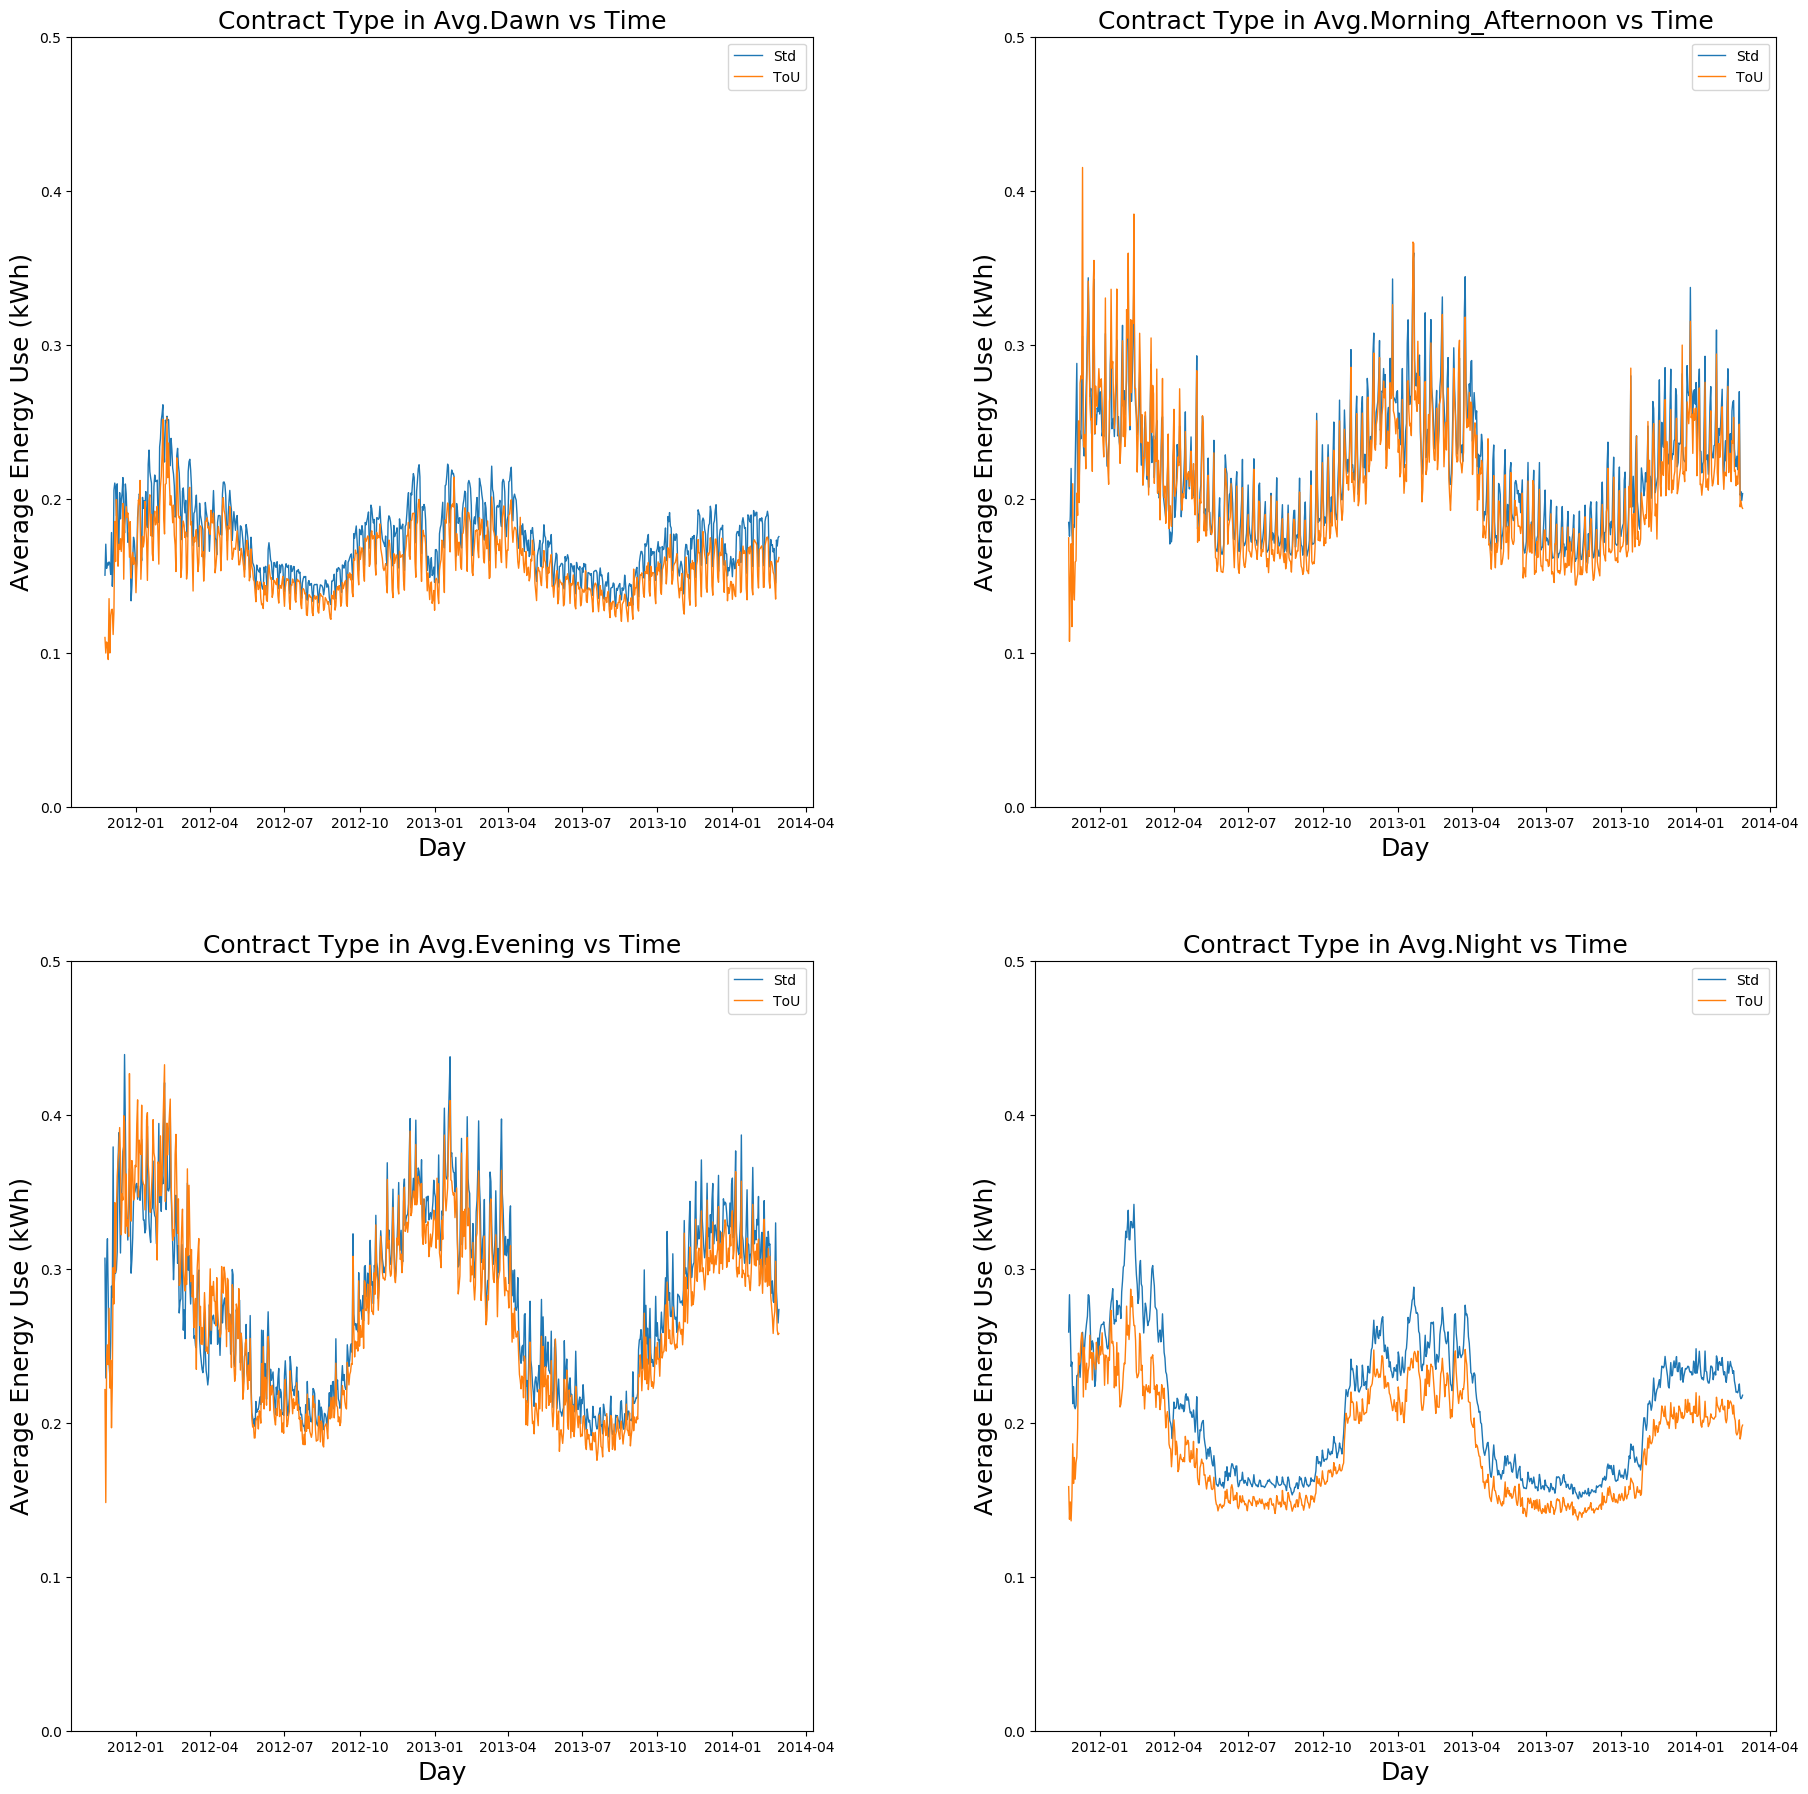

In [138]:
#Energy per Contract Type (time of day) vs Time
fig = plt.figure(figsize=(22,22))
fig.subplots_adjust(wspace=0.3, hspace=0.2)
for i, column in enumerate(['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night']):
    for value in ['Std', 'ToU']:
        ax = fig.add_subplot(2, 2, i + 1)
        contract_type = energy_df[energy_df['stdorToU'] == value]
        plt.plot(day[0], contract_type.groupby('day').mean()[column], label=value, linewidth = 1)
        ax.set_title('Contract Type in {} vs Time'.format(column), fontsize = 18)
        ax.set_ylabel('Average Energy Use (kWh)'.format(column), fontsize = 18)
        ax.set_xlabel('Day', fontsize = 18)
        ax.set_ylim(0, 0.50)
        plt.legend(loc="upper right")

***

In [139]:
#Function to create text in graphs ()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

Used bar graph to further explore differences in energy consumption between contract types

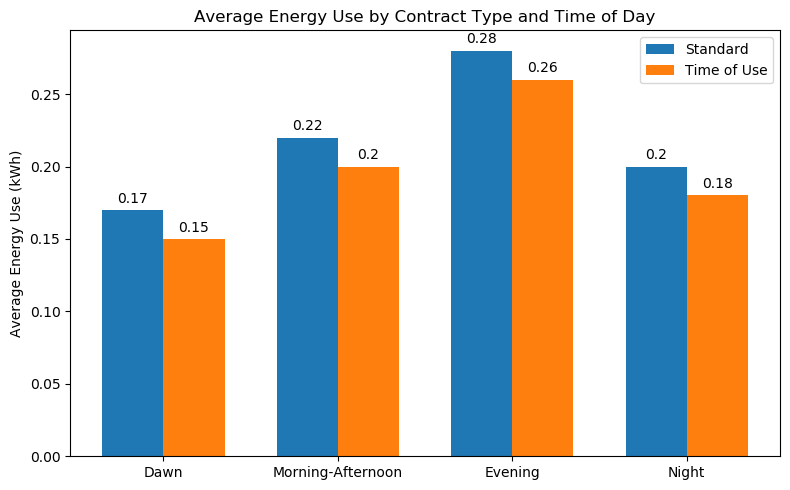

In [140]:
#Average Energy Use by Contract Type and Time of Day
labels = ['Dawn', 'Morning-Afternoon', 'Evening', 'Night']
values = energy_df.groupby('stdorToU').mean()[['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening', 'Avg.Night']].to_numpy()
std = list(np.around(values[0],2))
tou = list(np.around(values[1],2))

x = np.arange(len(labels))  
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, std, width, label='Standard')
rects2 = ax.bar(x + width/2, tou, width, label='Time of Use')

ax.set_ylabel('Average Energy Use (kWh)')
ax.set_title('Average Energy Use by Contract Type and Time of Day')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

Visualizing how energy consumption varies between acorns

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

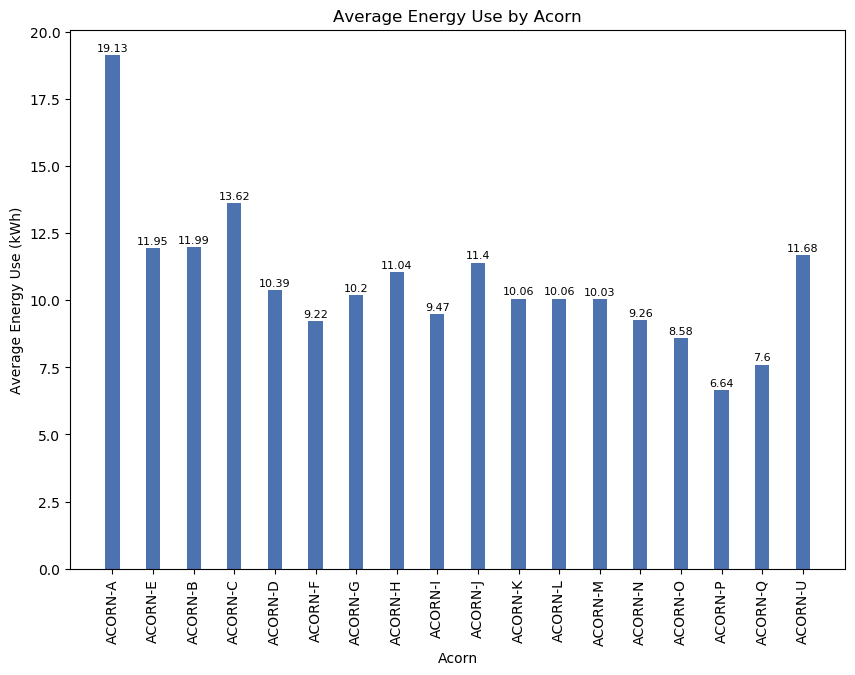

In [141]:
#Average Energy per Acorn 
labels_ac = energy_df['Acorn'].unique()
values_ac = energy_df.groupby('Acorn').mean()['energy_sum'].to_numpy()
average = list(np.around(values_ac,2))

fig, ax = plt.subplots(figsize=(10,7))

for i, label in enumerate(labels_ac):
    plt.bar(label, average[i], width = 0.35, label = label, color = 'b')
    plt.text(label, average[i] + 0.15, str(average[i]), horizontalalignment='center', fontsize = 8)
        
plt.title('Average Energy Use by Acorn')
plt.xlabel('Acorn')
plt.ylabel('Average Energy Use (kWh)')
plt.xticks(rotation = 90)

Visualizing Energy Consumption pero Acorn over time to identify the acorns with the most and least consumption and discover any changes in consumption patterns. 

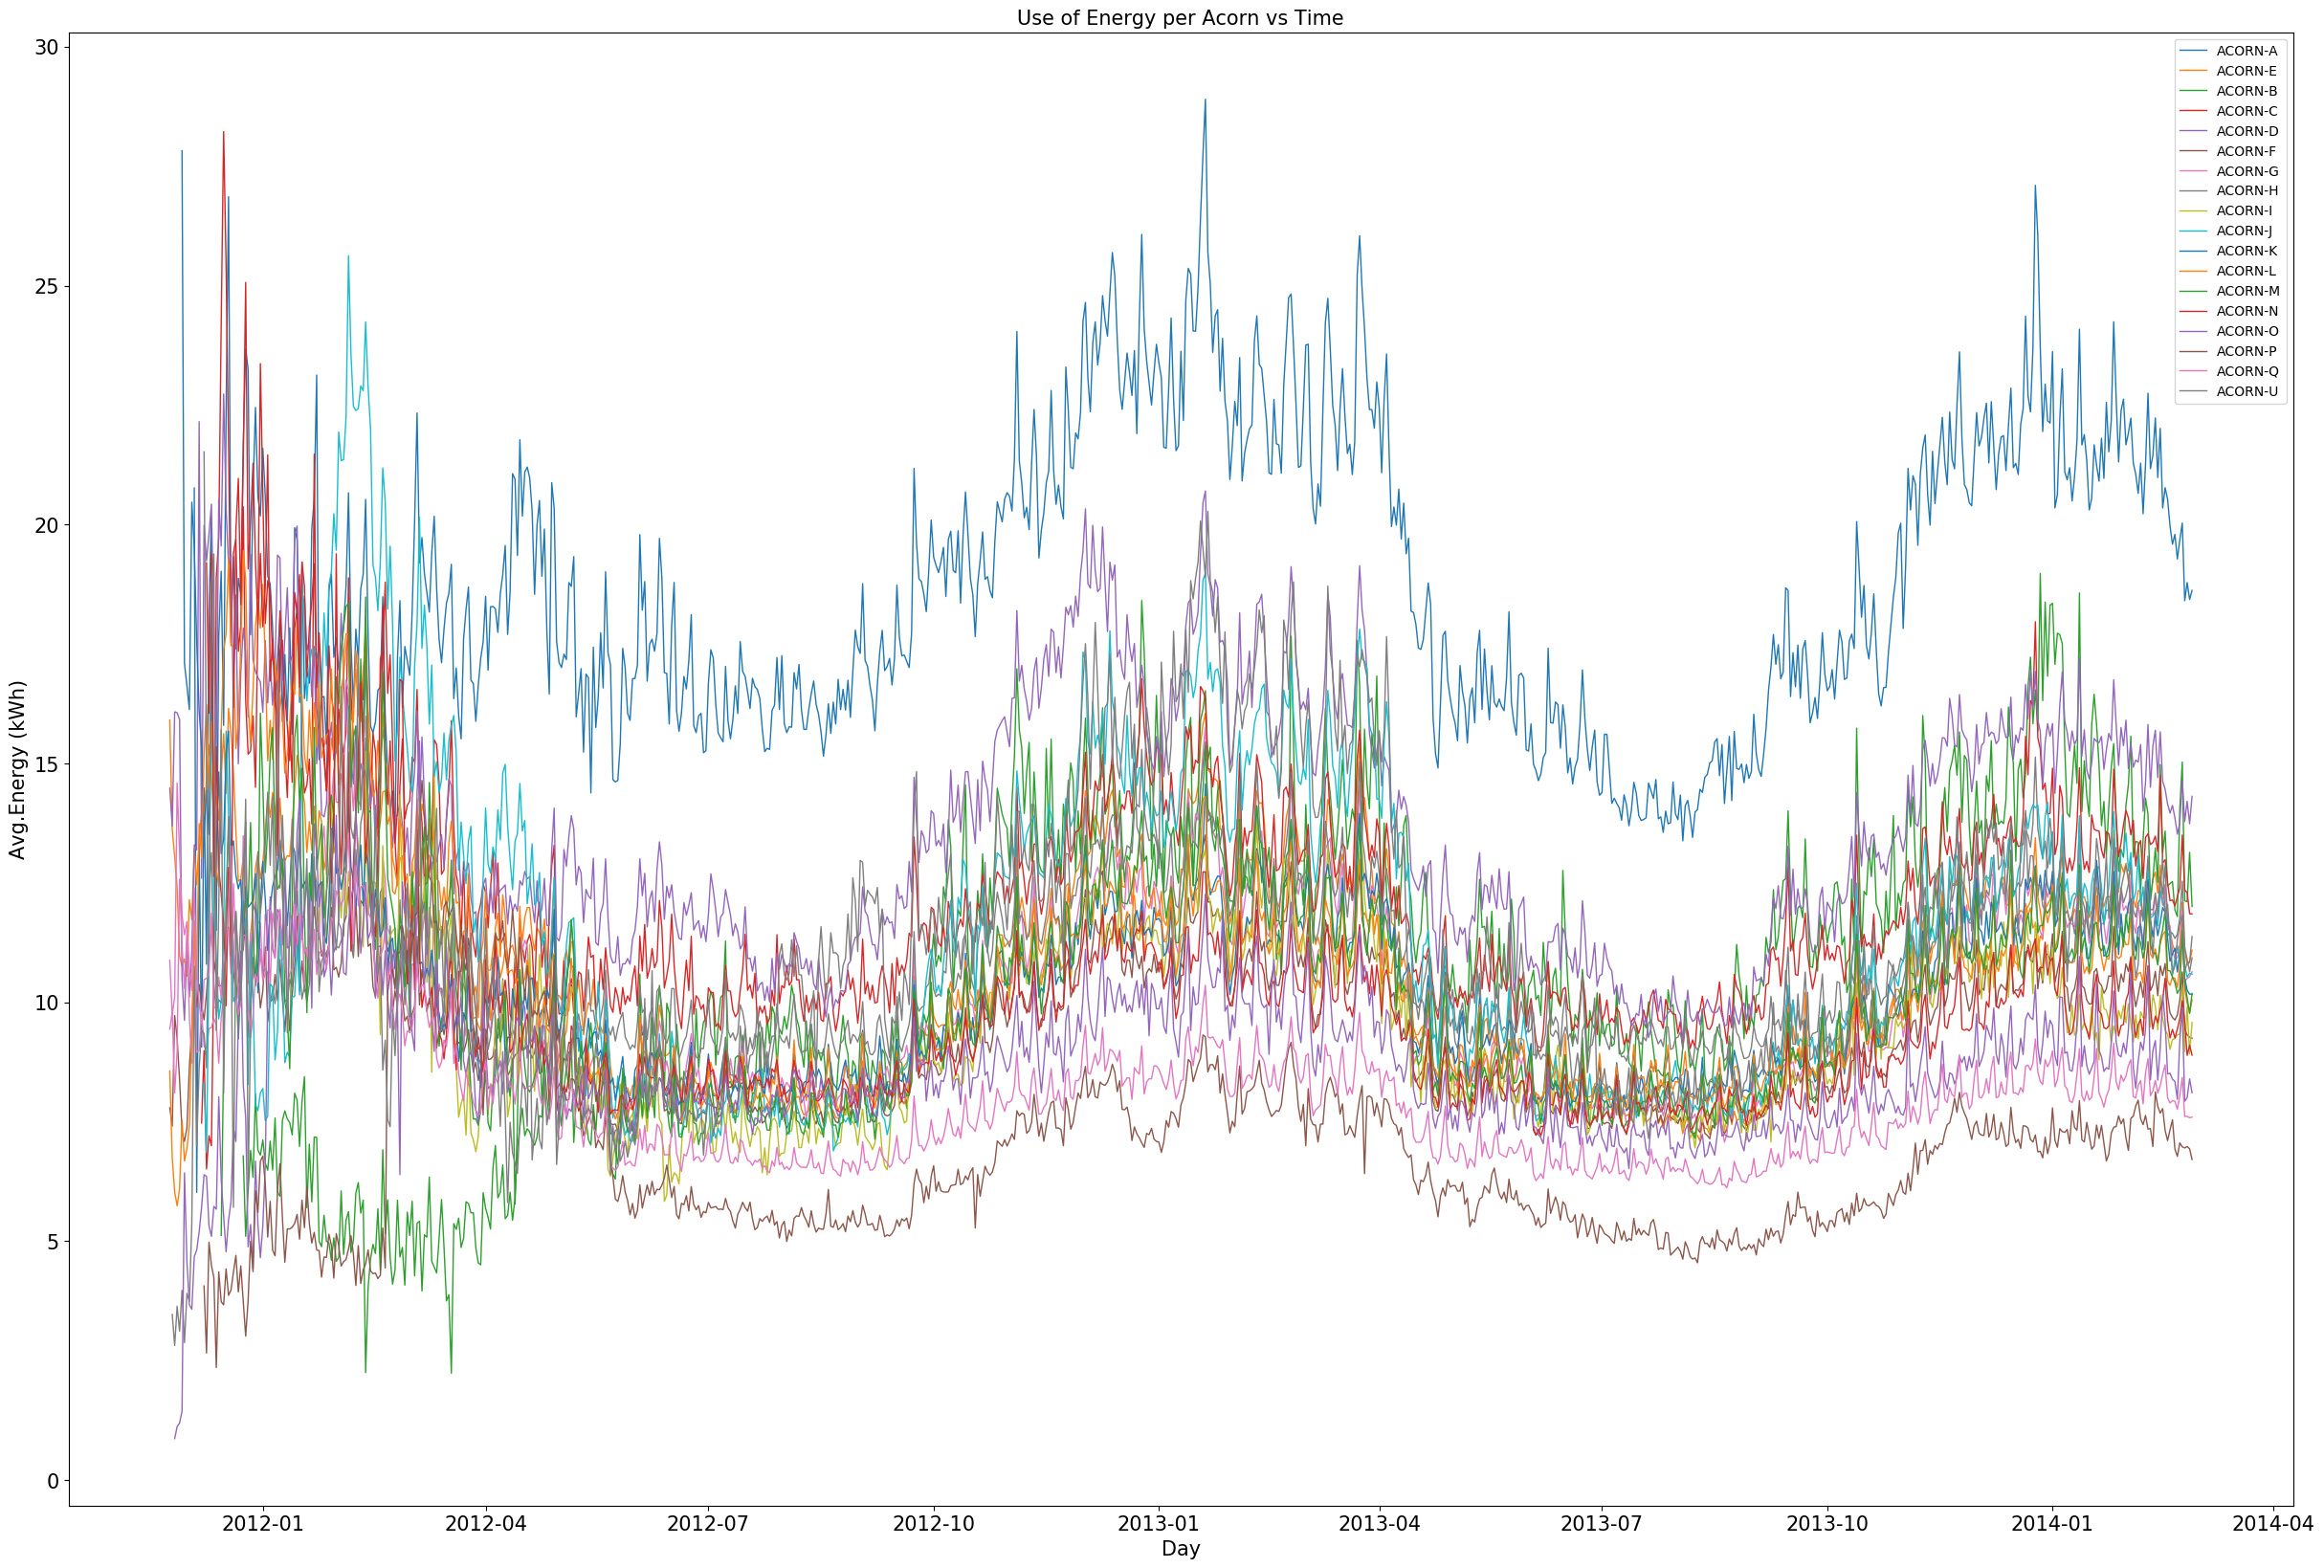

In [142]:
#Average Energy per Acorn vs Time
plt.figure(figsize=(30, 20))
for value in energy_df['Acorn'].unique():
    acorn = energy_df[energy_df['Acorn'] == value]
    acorn_df = pd.DataFrame(acorn.groupby('day'))
    plt.plot(acorn_df[0], acorn.groupby('day').mean()['energy_sum'], label=value, linewidth = 1)

plt.title('Use of Energy per Acorn vs Time', fontsize = 15)
plt.ylabel('Avg.Energy (kWh)', fontsize = 15)
plt.xlabel('Day', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc="upper right", prop={'size': 10})

plt.show()

Using Bar charts to identify differences between acorns' energy consumption at different times of the day. 

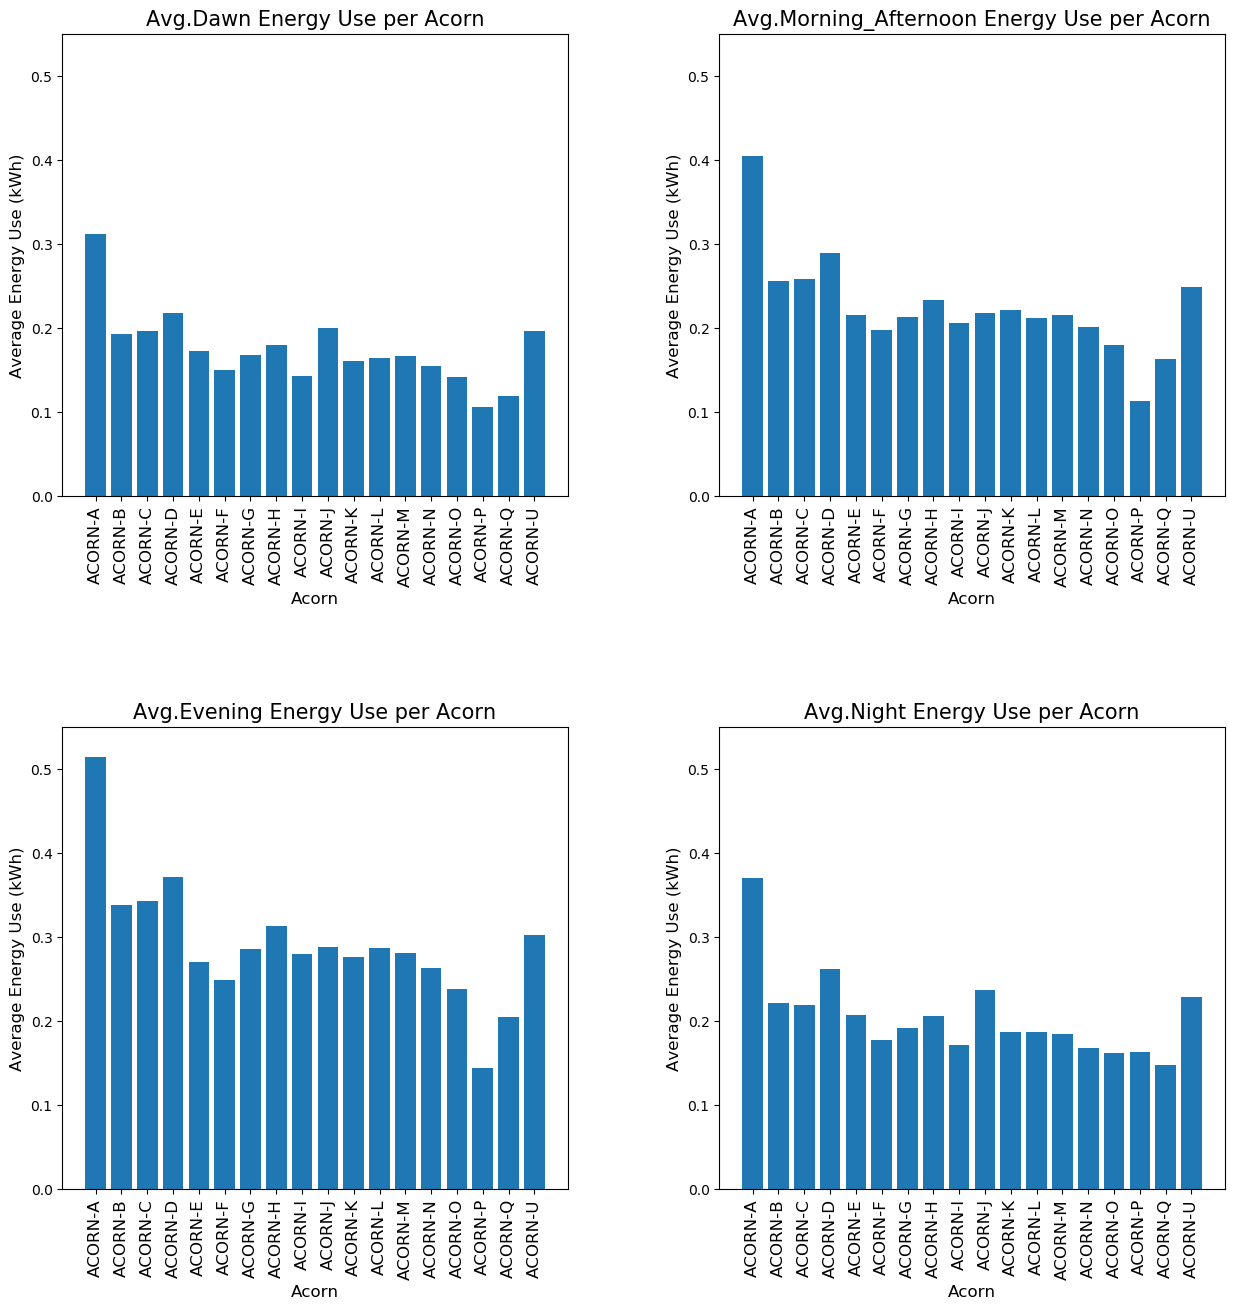

In [143]:
#Average Energy Use per Acorn by Time of Day
labels_aco = pd.DataFrame(energy_df.groupby('Acorn'))[0]

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(wspace=0.3, hspace=0.5)
for i, column in enumerate(['Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening','Avg.Night']):
    ax = fig.add_subplot(2, 2, i + 1)
    plt.bar(labels_aco, energy_df.groupby('Acorn').mean()[column])
    ax.set_title('{} Energy Use per Acorn'.format(column), fontsize = 15)
    ax.set_ylabel('Average Energy Use (kWh)'.format(column), fontsize = 12)
    ax.set_xlabel('Acorn', fontsize = 12)
    ax.set_xticklabels(labels_aco, rotation = 90, fontsize = 12)
    ax.set_ylim(0, 0.55)

***

Feature Importance and Elimination - Using a Random Forest to Identify and Select most important features for modelling section

In [144]:
##Preparing Data for Feature Importance analysis
#One-Hot Encode 'stdorToU', 'Acorn', 'Acorn_grouped', icon, precipType, uvIndex, Sunrise, Sunset, and Season
energyohe_df = pd.get_dummies(energy_df, columns=['sunset', 'sunrise'],
                           prefix=['ohe_sunset', 'ohe_sunrise'])

energyohe_df = pd.get_dummies(energyohe_df, columns=['stdorToU', 'Acorn', 'Acorn_grouped', 'icon', 'precipType',
                                              'uvIndex', 'Season'],
                           prefix=['ohe', 'ohe', 'ohe', 'oheicon', 'oheprecipType', 'oheuv', 'ohe'], 
                           drop_first = True)

In [145]:
#Checking changes 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(energyohe_df.head())

LCLid        day  Avg.Dawn  Avg.Morning_Afternoon  Avg.Evening  \
0  MAC000002 2012-10-13  0.133556               0.266667       0.2927   
1  MAC000246 2012-10-13  0.227889               0.342667       0.3197   
2  MAC000450 2012-10-13  1.216778               2.424250       2.7396   
3  MAC001074 2012-10-13  0.294333               0.552583       0.7322   
4  MAC003223 2012-10-13  0.126000               0.521250       0.6157   

   Avg.Night  holiday  energy_sum  temperatureMax  windBearing  cloudCover  \
0   0.218854        0   11.087000           12.32          300         0.2   
1   0.552292        0   19.283000           12.32          300         0.2   
2   1.344580        0   89.343999           12.32          300         0.2   
3   0.366943        0   22.727000           12.32          300         0.2   
4   0.335382        0   19.271000           12.32          300         0.2   

   windSpeed  pressure  visibility  humidity  moonPhase  ohe_sunset_16:00:00  \
0       2.36    1002.5       11.86       0.8       0.96                    0   
1       2.36    1002.5       11.86       0.8       0.96                    0   
2       2.36    1002.5       11.86       0.8       0.96                    0   
3       2.36    1002.5       11.86       0.8       0.96                    0   
4       2.36    1002.5       11.86       0.8       0.96                    0   

   ohe_sunset_17:00:00  ohe_sunset_18:00:00  ohe_sunset_19:00:00  \
0                    1                    0                    0   
1                    1                    0                    0   
2                    1                    0                    0   
3                    1                    0                    0   
4                    1                    0                    0   

   ohe_sunset_20:00:00  ohe_sunrise_04:00:00  ohe_sunrise_05:00:00  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   ohe_sunrise_06:00:00  ohe_sunrise_07:00:00  ohe_sunrise_08:00:00  ohe_ToU  \
0                     1                     0                     0        0   
1                     1                     0                     0        0   
2                     1                     0                     0        0   
3                     1                     0                     0        1   
4                     1                     0                     0        0   

   ohe_ACORN-B  ohe_ACORN-C  ohe_ACORN-D  ohe_ACORN-E  ohe_ACORN-F  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   ohe_ACORN-G  ohe_ACORN-H  ohe_ACORN-I  ohe_ACORN-J  ohe_ACORN-K  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ohe_ACORN-L  ohe_ACORN-M  ohe_ACORN-N  ohe_ACORN-O  ohe_ACORN-P  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ohe_ACORN-Q  ohe_ACORN-U  ohe_Affluent  o

In [146]:
#Creating X and y
X = energyohe_df.drop(['energy_sum', 'LCLid', 'day'], axis = 1)
y = energyohe_df['energy_sum']

In [58]:
# Random Forest for Feature Importance
rf = RandomForestRegressor()
model = rf.fit(X, y)
importances = model.feature_importances_

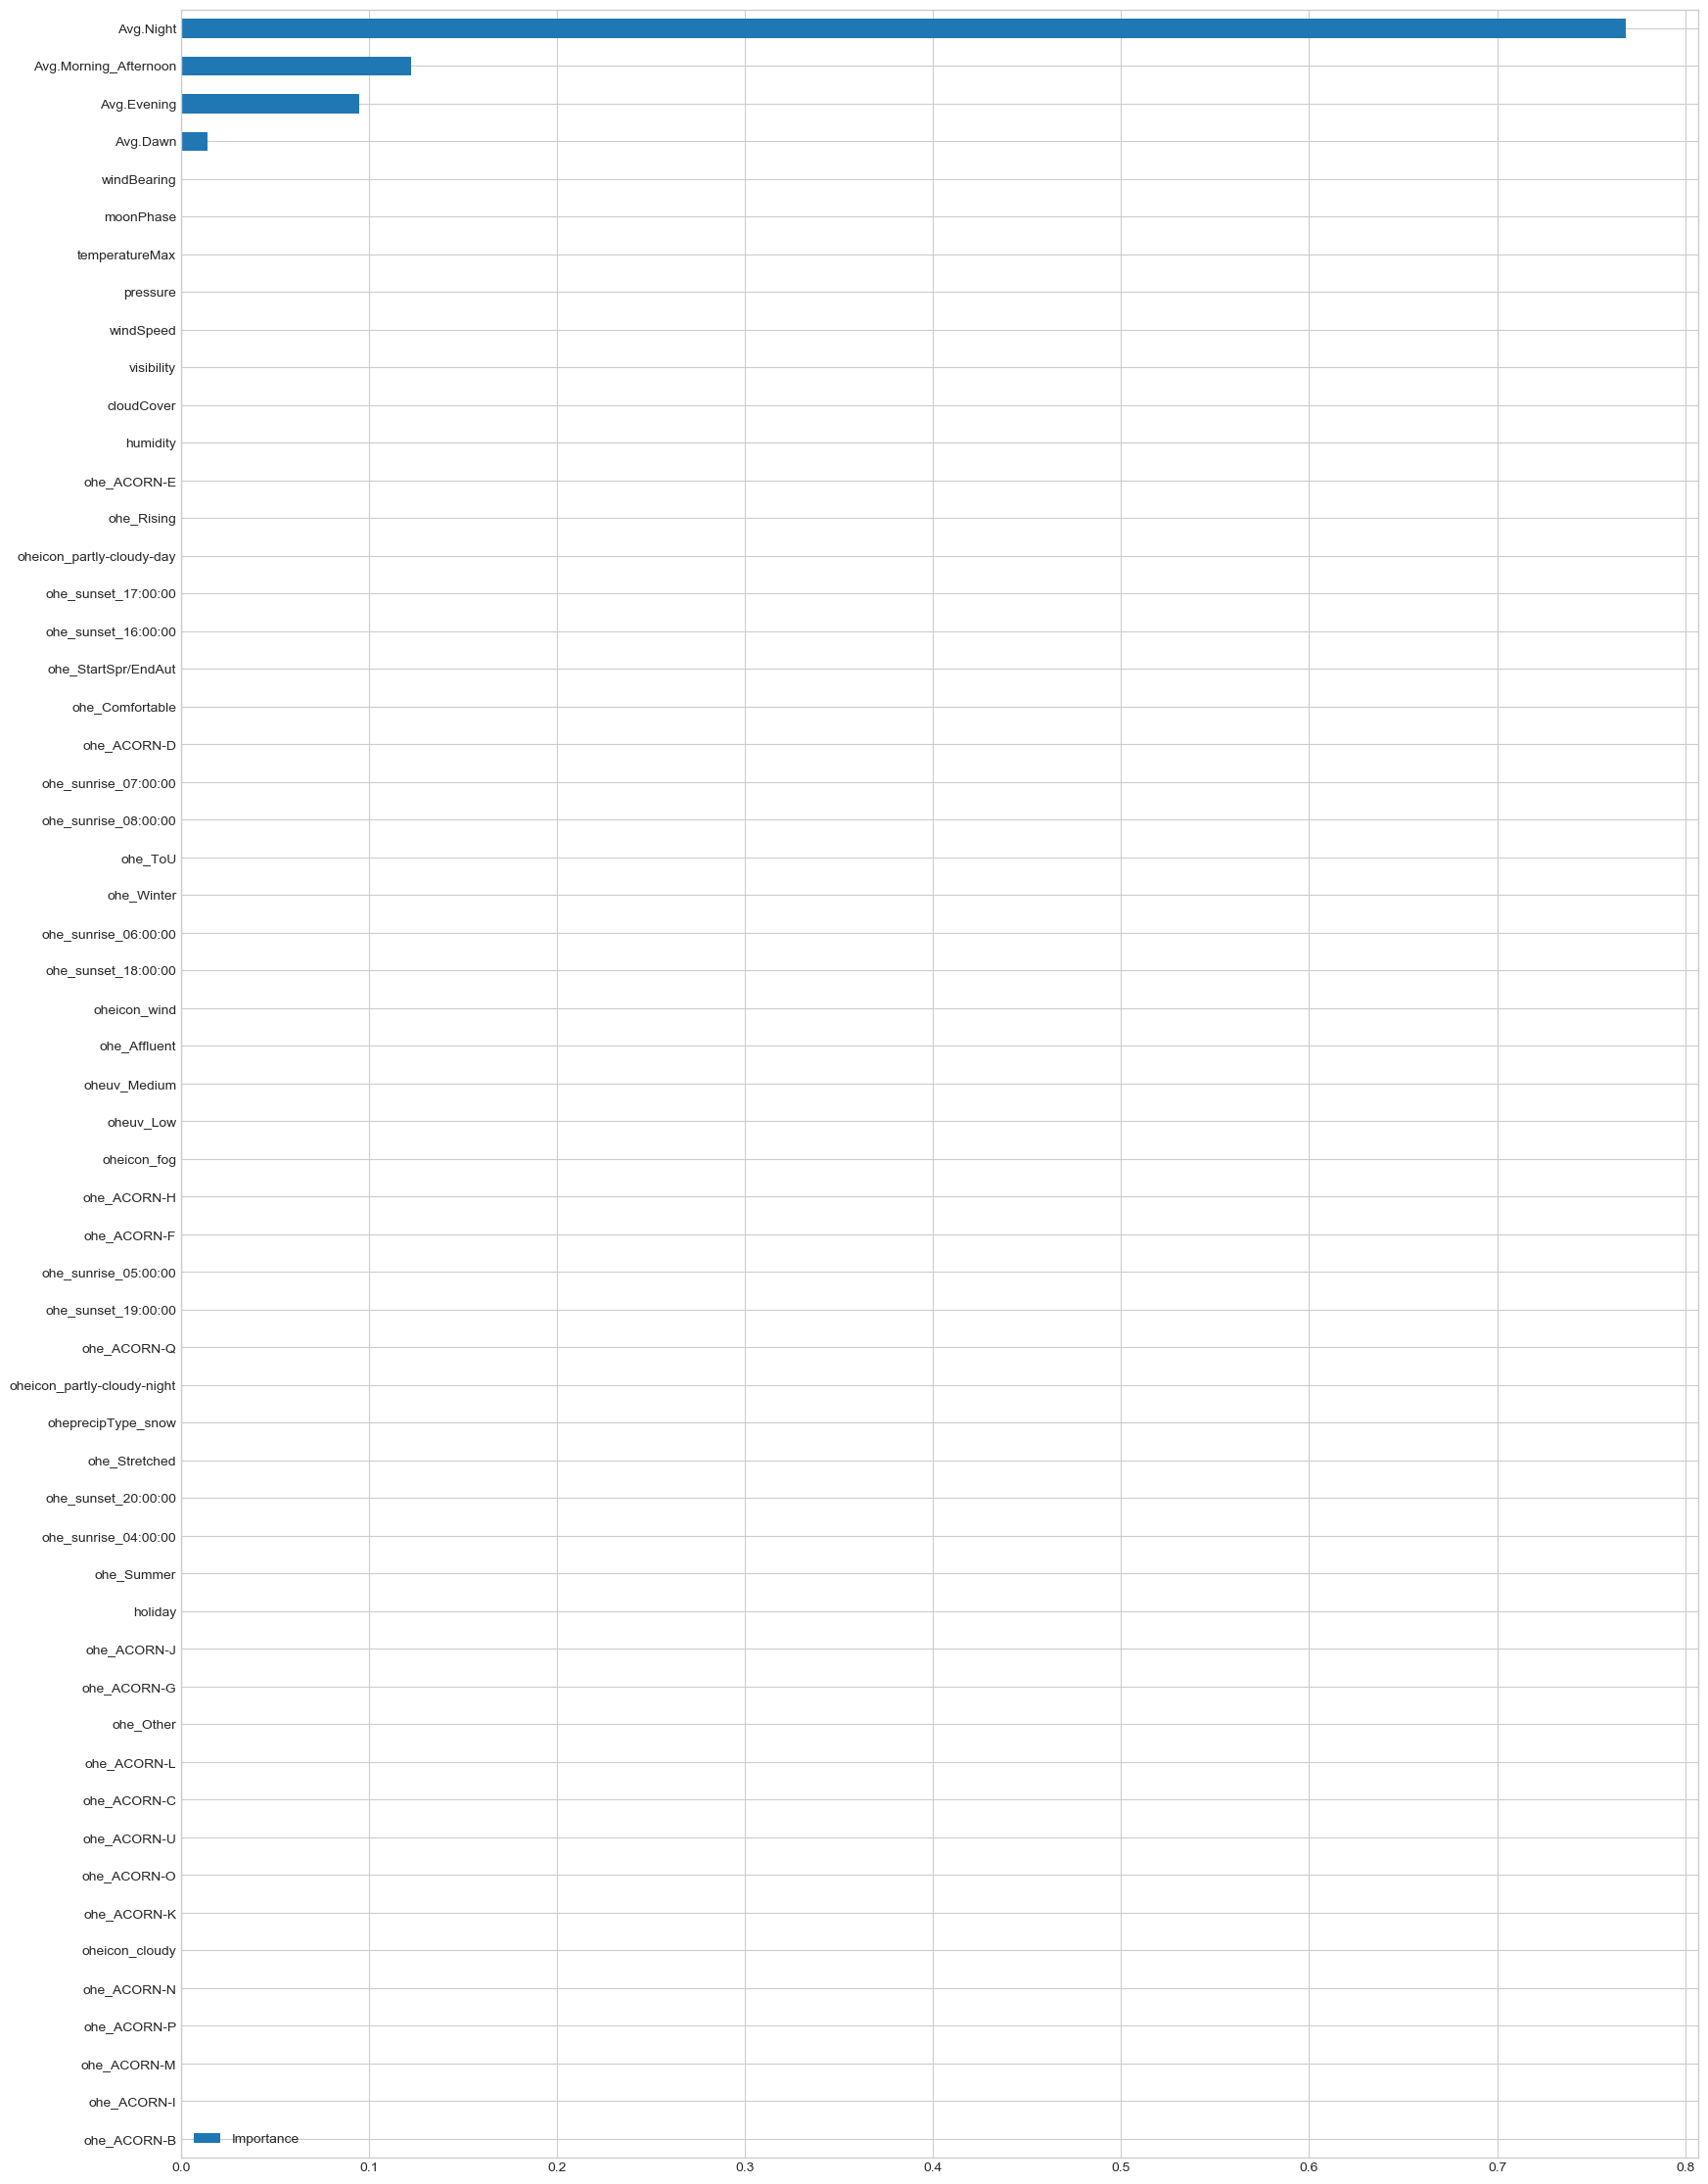

In [61]:
#Plotting Feature Importance
plt.style.use('seaborn-whitegrid')
importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"])
importances.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importances)/2))

<div class="alert alert-block alert-info">
    We have decided to only include <b> 'Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening', 'Avg.Night', 'energy_sum' </b> in our final dataframe. After analyzing the heatmap, we noticed these, together with the 'temperatureMax' feature, were the only variables with strong positive/negative correlations with the target variable. Then, with the Random Forest feature importance analysis, we were able to identify <b>'Avg.Dawn', 'Avg.Morning_Afternoon', 'Avg.Evening', 'Avg.Night' </b> as the most important features. Hence, only these will be used in the modelling section. 
        
</div>

## 3. Preparing Final DataFrames

- Overall Energy Sum per Day (energymodel_df)

We created this dataset to create a model that learns the underlying trend in energy consumption in London and  generates a forecast of overall energy consumption in London. 

In [9]:
energymodel_df = energyohe_df.groupby('day').mean()[['Avg.Dawn', 'Avg.Morning_Afternoon', 
                                                  'Avg.Evening', 'Avg.Night', 'energy_sum']]
energymodel_df

Avg.Dawn  Avg.Morning_Afternoon  Avg.Evening  Avg.Night  \
day                                                                   
2011-11-24  0.144103               0.183071     0.293677   0.243434   
2011-11-25  0.159178               0.164737     0.216092   0.259777   
2011-11-26  0.145778               0.180977     0.290919   0.239186   
2011-11-27  0.150526               0.212498     0.309366   0.221866   
2011-11-28  0.147908               0.169063     0.275751   0.226584   
...              ...                    ...          ...        ...   
2014-02-23  0.143160               0.265201     0.324636   0.220371   
2014-02-24  0.170418               0.200802     0.283150   0.211457   
2014-02-25  0.167168               0.203331     0.271581   0.210754   
2014-02-26  0.171453               0.198016     0.263226   0.212335   
2014-02-27  0.172613               0.201372     0.270311   0.213864   

            energy_sum  
day                     
2011-11-24   10.728615  
2011-11-25   10.182200  
2011-11-26   10.610687  
2011-11-27   10.850805  
2011-11-28   10.105561  
...                ...  
2014-02-23   11.495899  
2014-02-24   10.421352  
2014-02-25   10.294125  
2014-02-26   10.216438  
2014-02-27   10.362517  

[825 rows x 5 columns]

***

- Creating DataFrame with Acorns for Analysis in Modelling Section (acornmodel_df)

We created this dataset to create a model that learns the underlying trend in energy consumption in per Acorn in London and generates a forecast of overall energy consumption per Acorn.. 

In [10]:
acornmodel_df = pd.get_dummies(energy_df, columns=['Season'], prefix=['ohe'], 
                           drop_first = True)
acornmodel_df = acornmodel_df[['Acorn', 'day', 'Avg.Dawn', 'Avg.Morning_Afternoon', 
                               'Avg.Evening', 'Avg.Night', 'energy_sum']]
acornmodel_df

Acorn         day  Avg.Dawn  Avg.Morning_Afternoon  Avg.Evening  \
0        ACORN-A  2012-10-13  0.133556               0.266667       0.2927   
1        ACORN-A  2012-10-13  0.227889               0.342667       0.3197   
2        ACORN-A  2012-10-13  1.216778               2.424250       2.7396   
3        ACORN-E  2012-10-13  0.294333               0.552583       0.7322   
4        ACORN-A  2012-10-13  0.126000               0.521250       0.6157   
...          ...         ...       ...                    ...          ...   
3458669  ACORN-Q  2011-11-28  0.108444               0.200417       0.4120   
3458670  ACORN-Q  2011-11-28  0.121889               0.120917       0.3474   
3458671  ACORN-Q  2011-11-28  0.176667               0.373250       0.6822   
3458672  ACORN-Q  2011-11-28  0.063333               0.077917       0.2352   
3458673  ACORN-Q  2011-11-28  0.271222               0.366917       0.2494   

         Avg.Night  energy_sum  
0         0.218854   11.087000  
1         0.552292   19.283000  
2         1.344580   89.343999  
3         0.366943   22.727000  
4         0.335382   19.271000  
...            ...         ...  
3458669   0.186624   10.738000  
3458670   0.252832   10.583000  
3458671   0.605943   23.854000  
3458672   0.122382    6.041000  
3458673   0.299113   14.383000  

[3458674 rows x 7 columns]

## 4. Exporting Data

In [11]:
#Exporting energymodel_df
energymodel_df.to_csv('energymodel_df.csv', index = True)

In [12]:
#Exporting acornmodel_df
acornmodel_df.to_csv('acornmodel_df.csv', index = False)